In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import warnings
warnings.filterwarnings('ignore')


Variables

**OSEBuildingID** : L'ID du bâtiment

**DataYear** : Année de consommation

**BuildingType** : Type de Building (Résidence ou pas)

**PrimaryPropertyType** : Type de propriété (Hotel, Ecole...)

**PropertyName** : Nom du bâtiment

**Address** : L'adresse du bâtiment

**City** : La ville où est situé le bâtiment

**State** : L'état où est situé le bâtiment

**ZipCode** : Code postal (peut être différent même dans un même état)

**TaxParcelIdentificationNumber** : Numero identification (fiscale)

**CouncilDistrictCode** : Code du district du conseil de la ville de Seattle

**Neighborhood** : Quartier

**Latitude** : La latitude

**Longitude** : La longitude

**YearBuilt** : Date de création ou de rénovation

**NumberofBuildings** : Nombre de buildings dans la propriété

**NumberofFloors** : Nombre d'étages

**PropertyGFATotal** : Surface brute de plancher totale du bâtiment et du parking

**PropertyGFAParking** : Espace brute de tous les types de stationnement

**PropertyGFABuilding(s)** : Surface brute du bâtiment

**ListOfAllPropertyUseTypes** : Types d'utilisation de la propriété

**LargestPropertyUseType** : Type d'utilisation principale de la propriété

**LargestPropertyUseTypeGFA** : Surface brute de plancher (Utilisation principale)

**SecondLargestPropertyUseType** : Type d'utilisation secondaire de la propriété

**SecondLargestPropertyUseTypeGFA** : Surface brute de plancher (Utilisation secondaire)

**ThirdLargestPropertyUseType** : Type d'utilisation tertiaire de la propriété

**ThirdLargestPropertyUseTypeGFA** : Surface brute de plancher (Utilisation tertiaire)

**YearsENERGYSTARCertified** : Année à laquelle la propriété a reçu la certification ENERGYSTAR

**ENERGYSTARScore** : Score (de 1 à 100) qui calcule la performance énergétique d'un bien immobilier

**SiteEUI(kBtu/sf)** : Énergie annuelle consommée d'un bien immobilier / Surface brute de plancher

**SiteEUIWN(kBtu/sf)** : SiteEUI(kBtu/sf) normalisée en fonction des conditions météorologiques

**SourceEUI(kBtu/sf)** : Énergie annuelle consommée d'un bien immobilier (y compris les pertes) / Surface brute de plancher

**SourceEUIWN(kBtu/sf)** : SourceEUI(kBtu/sf) normalisée en fonction des conditions météorologiques

**SiteEnergyUse(kBtu)** : Quantité annuelle d'énergie consommée, toutes sources d'énergie confondues

**SiteEnergyUseWN(kBtu)** : SiteEnergyUse(kBtu) normalisée en fonction des conditions météorologiques

**SteamUse(kBtu)** : Quantité annuelle de vapeur urbaine consommée

**Electricity(kWh)** : Quantité annuelle d'électricité consommée

**Electricity(kBtu)** : Electricity mais en British thermal units (kBtu)

**NaturalGas(therms)** : Quantité annuelle de gaz naturel consommée (therms)

**NaturalGas(kBtu)** : NaturalGas mais en British thermal units (kBtu).

**DefaultData** : A-t-on utilisé des valeurs par défaut (fausses valeurs) sur certaines features?

**Comments** : Commentaires du propriétaire ajoutant du contexte sur les valeurs des features

**ComplianceStatus** : Satisfait-il aux exigences de l'analyse de la consommation d'énergie?

**Outlier** : Ce bâtiment est-il dans la moyenne ou exceptionnel?

**TotalGHGEmissions** : Quantité totale d'émissions de (dioxyde de carbone + le méthane + l'oxyde nitreux)

**GHGEmissionsIntensity** : TotalGHGEmissions / Surface brute de plancher de la propriété


In [2]:
pd.set_option('display.max_columns', None)
data_2016 = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [3]:
data_2016.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

In [4]:
data_2016.shape

(3376, 46)

In [5]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [6]:
data_2016.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


In [7]:
data_2016.duplicated().sum()

0

In [8]:
data_2016['OSEBuildingID'].duplicated().sum()

0

# Récupérations des bâtiments non destinés à l'habitation

In [9]:
data_2016["BuildingType"].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

On va par conséquent supprimer les lignes ou les bâtiments sont résidentiels:

    Multifamily MR (5-9)
    Multifamily LR (1-4)
    Multifamily HR (10+)



In [10]:
# Suppression  les lignes avec les valeurs spécifiées
data_2016 = data_2016.drop(data_2016[data_2016["BuildingType"].str.contains("Multifamily")].index)
data_2016.shape

(1668, 46)

# Gestion outliers

In [11]:
data_2016['ComplianceStatus'].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [12]:
data_2016['Outlier'].unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [13]:
data_2016['DefaultData'].unique()

array([False,  True])

In [14]:
#  Suppression  des lignes dont la valeur de 'ComplianceStatus' est 'Error - Correct Default Data','Missing Data','Non-Compliant'


data_2016 = data_2016.loc[(data_2016['ComplianceStatus']=='Compliant')]


# Suppression  des valeurs d'outliers de type 'High outlier'
data_2016 = data_2016.drop(data_2016[data_2016['Outlier'] == 'High outlier'].index)

# Suppression des valeurs d'outliers de type 'Low outlier'
data_2016 = data_2016 = data_2016.drop(data_2016[data_2016['Outlier'] == 'Low outlier'].index)
data_2016.shape


(1548, 46)

# valeurs manquantes

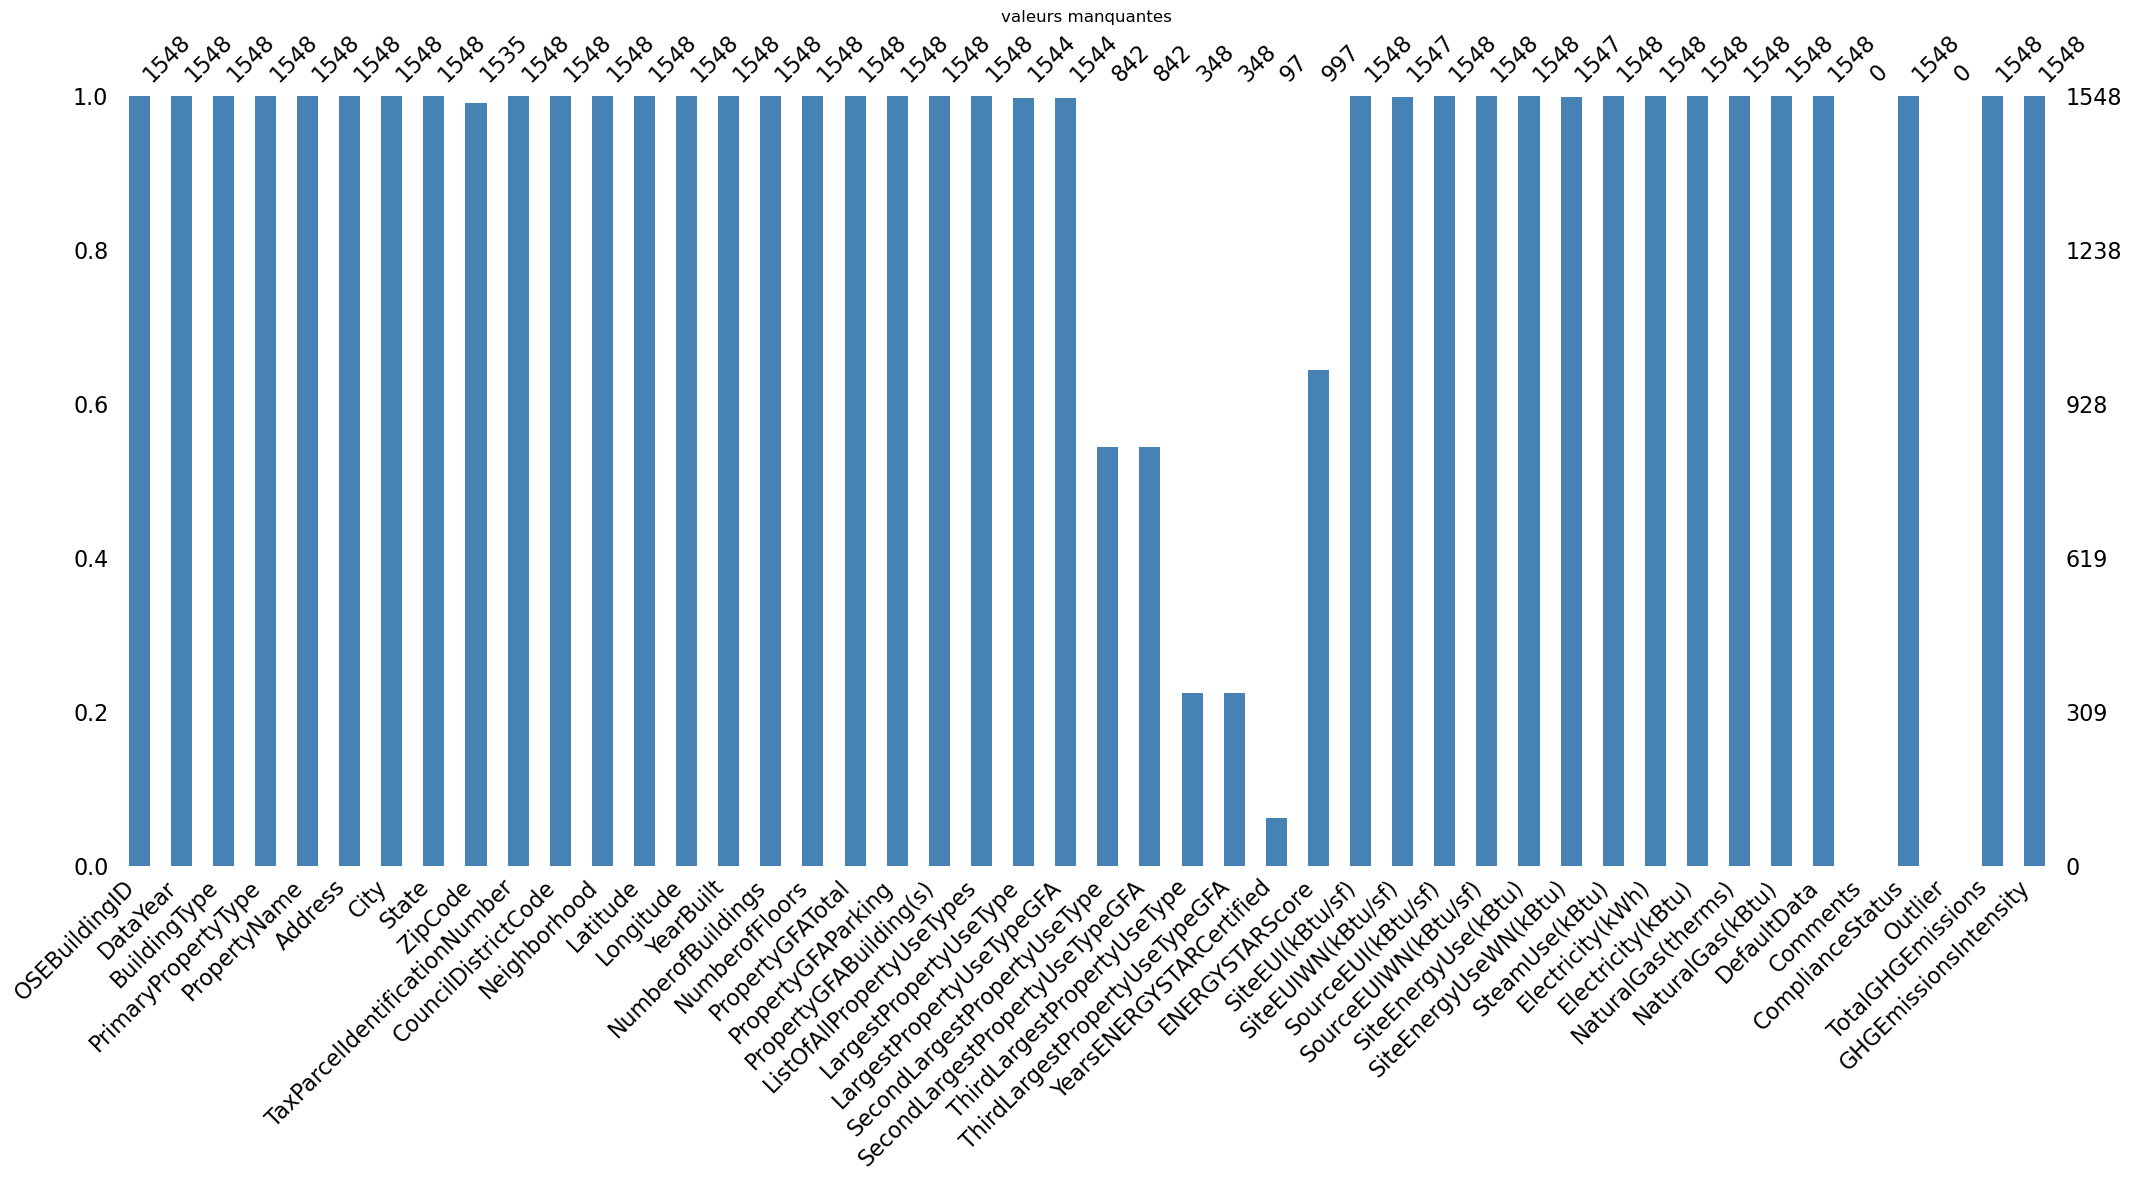

In [15]:
# la fonction msno.bar pour afficher les valeurs manquantes
msno.bar(data_2016, color='steelblue')

plt.title("valeurs manquantes")

plt.show()


On peut voir que la majorité des colonnes ont des informations complètesV

In [16]:
data_2016.isna().mean()

OSEBuildingID                      0.000000
DataYear                           0.000000
BuildingType                       0.000000
PrimaryPropertyType                0.000000
PropertyName                       0.000000
Address                            0.000000
City                               0.000000
State                              0.000000
ZipCode                            0.008398
TaxParcelIdentificationNumber      0.000000
CouncilDistrictCode                0.000000
Neighborhood                       0.000000
Latitude                           0.000000
Longitude                          0.000000
YearBuilt                          0.000000
NumberofBuildings                  0.000000
NumberofFloors                     0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
ListOfAllPropertyUseTypes          0.000000
LargestPropertyUseType             0.002584
LargestPropertyUseTypeGFA       

In [17]:
filtered_columns = data_2016.columns[data_2016.isna().mean() <= 0.9]
filtered_columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
 

In [18]:
DATA = data_2016[filtered_columns]

In [19]:
DATA.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0             60.0         81.699997           84.300003          182.500000   
1             61.0         94.800003           97.900002          176.100006   
2             43.0         96.000000           97.699997          241.899994   
3             56.0        110.800003          113.300003          216.199997   
4             75.0        114.800003          118.699997          211.399994   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0            189.000000            722636

In [20]:
DATA.shape

(1548, 43)

In [21]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 3375
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1548 non-null   int64  
 1   DataYear                         1548 non-null   int64  
 2   BuildingType                     1548 non-null   object 
 3   PrimaryPropertyType              1548 non-null   object 
 4   PropertyName                     1548 non-null   object 
 5   Address                          1548 non-null   object 
 6   City                             1548 non-null   object 
 7   State                            1548 non-null   object 
 8   ZipCode                          1535 non-null   float64
 9   TaxParcelIdentificationNumber    1548 non-null   object 
 10  CouncilDistrictCode              1548 non-null   int64  
 11  Neighborhood                     1548 non-null   object 
 12  Latitude            

In [22]:
liste=['DataYear', 'City', 'State', 'ZipCode','ComplianceStatus', 'Address', 'Neighborhood', 'BuildingType', 'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'DefaultData', 'OSEBuildingID','ListOfAllPropertyUseTypes','NaturalGas(therms)', 'Electricity(kWh)', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)']
data = DATA.drop(columns=liste)

In [23]:
data.head()

PrimaryPropertyType  Latitude  Longitude  YearBuilt  NumberofBuildings  \
0               Hotel  47.61220 -122.33799       1927                1.0   
1               Hotel  47.61317 -122.33393       1996                1.0   
2               Hotel  47.61393 -122.33810       1969                1.0   
3               Hotel  47.61412 -122.33664       1926                1.0   
4               Hotel  47.61375 -122.34047       1980                1.0   

   NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0              12             88434                   0   
1              11            103566               15064   
2              41            956110              196718   
3              10             61320                   0   
4              18            175580               62000   

   PropertyGFABuilding(s) LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                   88434                  Hotel                    88434.0   
1                   88502                  Hotel                    83880.0   
2                  759392                  Hotel                   756493.0   
3                   61320                  Hotel                    61320.0   
4                  113580                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

   ENERGYSTARScore  SiteEUIWN(kBtu/sf)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
0             60.0           84.300003              7456910.0      2003882.00   
1             61.0           97.900002              8664479.0            0.00   
2             43.0           97.699997             73937112.0     21566554.00   
3             56.0          113.300003              6946800.5      2214446.25   
4             75.0          118.699997             14656503.0            0.00   

   Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
0          3946027.0         1276453.0             249.98   
1          3242851.0         5145082.0             295.86   
2         49526664.0         1493800.0            2089.28   
3          2768924.0         1811213.0             286.43   
4          5368607.0         8803998.0             505.01   

   GHGEmissionsIntensity  
0                   2.83  
1                   2.86  
2                   2.19  
3                   4.67  
4                   2.88

In [24]:
data.isna().sum()

PrimaryPropertyType                   0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseType                4
LargestPropertyUseTypeGFA             4
SecondLargestPropertyUseType        706
SecondLargestPropertyUseTypeGFA     706
ThirdLargestPropertyUseType        1200
ThirdLargestPropertyUseTypeGFA     1200
ENERGYSTARScore                     551
SiteEUIWN(kBtu/sf)                    1
SiteEnergyUseWN(kBtu)                 1
SteamUse(kBtu)                        0
Electricity(kBtu)                     0
NaturalGas(kBtu)                      0
TotalGHGEmissions                     0
GHGEmissionsIntensity                 0
dtype: int64

SecondLargestPropertyUseTypeGFA et ThirdLargestPropertyUseTypeGFA ont des NaN, ce qui signifie que leur surface est nulle, on transforme ces NaN en zero

In [25]:
data['SecondLargestPropertyUseTypeGFA'] = data['SecondLargestPropertyUseTypeGFA'].fillna(0)
data['ThirdLargestPropertyUseTypeGFA'] = data['ThirdLargestPropertyUseTypeGFA'].fillna(0)

In [26]:
data.shape

(1548, 23)

# controle coherences 

In [27]:
data.describe(include= 'all')

PrimaryPropertyType     Latitude    Longitude    YearBuilt  \
count                          1548  1548.000000  1548.000000  1548.000000   
unique                           21          NaN          NaN          NaN   
top     Small- and Mid-Sized Office          NaN          NaN          NaN   
freq                            286          NaN          NaN          NaN   
mean                            NaN    47.616488  -122.333518  1961.644057   
std                             NaN     0.046954     0.023264    32.886918   
min                             NaN    47.509590  -122.411820  1900.000000   
25%                             NaN    47.587855  -122.342997  1930.000000   
50%                             NaN    47.612710  -122.333160  1965.500000   
75%                             NaN    47.649060  -122.322700  1989.000000   
max                             NaN    47.733870  -122.261800  2015.000000   

        NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count         1548.000000     1548.000000      1.548000e+03   
unique                NaN             NaN               NaN   
top                   NaN             NaN               NaN   
freq                  NaN             NaN               NaN   
mean             1.178941        4.276486      1.213321e+05   
std              3.039221        6.780694      3.062944e+05   
min              0.000000        0.000000      1.128500e+04   
25%              1.000000        1.000000      2.884325e+04   
50%              1.000000        2.000000      4.815900e+04   
75%              1.000000        4.000000      1.076615e+05   
max            111.000000       99.000000      9.320156e+06   

        PropertyGFAParking  PropertyGFABuilding(s) LargestPropertyUseType  \
count          1548.000000            1.548000e+03                   1544   
unique                 NaN                     NaN                     55   
top                    NaN                     NaN                 Office   
freq                   NaN                     NaN                    485   
mean          13842.337209            1.074898e+05                    NaN   
std           43721.822291            2.926272e+05                    NaN   
min               0.000000            3.636000e+03                    NaN   
25%               0.000000            2.793675e+04                    NaN   
50%               0.000000            4.608400e+04                    NaN   
75%               0.000000            9.556825e+04                    NaN   
max          512608.000000            9.320156e+06                    NaN   

        LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
count                1.544000e+03                          842   
unique                        NaN                           47   
top                           NaN                      Parking   
freq                          NaN                          331   
mean                 9.994564e+04                          NaN   
std                  2.855014e+05                          NaN   
min                  5.656000e+03                          NaN   
25%                  2.501575e+04                          NaN   
50%                  4.204300e+04                          NaN   
75%                  9.203675e+04                          NaN   
max                  9.320156e+06                          NaN   

        SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
count                       1548.000000                         348   
unique                              NaN                          39   
top                                 NaN                      Office   
freq                                NaN                          49   
mean                       19767.689468                         NaN   
std                        52358.665572                         NaN   
min                            0.000000                         NaN   
25%                            0.000

In [29]:
buildings_0 = data.loc[data['NumberofBuildings']==0].index
floors_0 = data.loc[data['NumberofFloors']==0].index
emession_0 = data.loc[data['TotalGHGEmissions']==0].index
energy_0 = data.loc[data['SiteEnergyUseWN(kBtu)']==0].index

In [30]:
#suppression des lignes 0
data.drop(buildings_0 , axis=0, inplace = True, errors = 'ignore')
data.drop(floors_0  , axis=0, inplace = True, errors = 'ignore')
data.drop(emession_0  , axis=0, inplace = True, errors = 'ignore')
data.drop(energy_0  , axis=0, inplace = True, errors = 'ignore')

In [31]:
# Suppression des lignes avec au moins une valeur négative dans les colonnes spécifiées
columns_to_check = ['PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
                    'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUIWN(kBtu/sf)',
                    'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
                    'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity']

data = data[~(data[columns_to_check] < 0).any(axis=1)]


In [32]:
data.describe(include= 'all')

PrimaryPropertyType     Latitude    Longitude    YearBuilt  \
count                          1471  1471.000000  1471.000000  1471.000000   
unique                           21          NaN          NaN          NaN   
top     Small- and Mid-Sized Office          NaN          NaN          NaN   
freq                            273          NaN          NaN          NaN   
mean                            NaN    47.616156  -122.333763  1961.461591   
std                             NaN     0.047153     0.023098    32.835889   
min                             NaN    47.509590  -122.411820  1900.000000   
25%                             NaN    47.586920  -122.343160  1930.000000   
50%                             NaN    47.612520  -122.333180  1965.000000   
75%                             NaN    47.648750  -122.323050  1988.000000   
max                             NaN    47.733870  -122.261800  2015.000000   

        NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count         1471.000000     1471.000000      1.471000e+03   
unique                NaN             NaN               NaN   
top                   NaN             NaN               NaN   
freq                  NaN             NaN               NaN   
mean             1.138001        4.312033      1.132629e+05   
std              1.174846        6.864568      1.958055e+05   
min              1.000000        1.000000      1.128500e+04   
25%              1.000000        1.000000      2.880000e+04   
50%              1.000000        2.000000      4.755400e+04   
75%              1.000000        4.000000      1.040495e+05   
max             27.000000       99.000000      2.200000e+06   

        PropertyGFAParking  PropertyGFABuilding(s) LargestPropertyUseType  \
count          1471.000000            1.471000e+03                   1467   
unique                 NaN                     NaN                     53   
top                    NaN                     NaN                 Office   
freq                   NaN                     NaN                    464   
mean          14039.500340            9.922344e+04                    NaN   
std           44282.972515            1.721823e+05                    NaN   
min               0.000000            3.636000e+03                    NaN   
25%               0.000000            2.780000e+04                    NaN   
50%               0.000000            4.550000e+04                    NaN   
75%               0.000000            9.363500e+04                    NaN   
max          512608.000000            2.200000e+06                    NaN   

        LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
count                1.467000e+03                          801   
unique                        NaN                           47   
top                           NaN                      Parking   
freq                          NaN                          321   
mean                 9.249885e+04                          NaN   
std                  1.624884e+05                          NaN   
min                  5.656000e+03                          NaN   
25%                  2.475700e+04                          NaN   
50%                  4.160900e+04                          NaN   
75%                  8.910300e+04                          NaN   
max                  1.719643e+06                          NaN   

        SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
count                       1471.000000                         325   
unique                              NaN                          37   
top                                 NaN                      Office   
freq                                NaN                          47   
mean                       19254.748672                         NaN   
std                        50974.724652                         NaN   
min                            0.000000                         NaN   
25%                            0.000

# Features engineering

In [33]:
#Calcule de l’âge du bâtiment 
data['BuildingAge'] = 2016 - data['YearBuilt']
data= data.drop(['YearBuilt'],axis=1)

On va  créer une variable représentant le ratio de la surface de parking en fonction de la surface totale. En effet, un parking consommant moins, il peut être intéressant de connaître la proportion de parking.


In [34]:
data['ParkingRatioGFA'] = data['PropertyGFAParking']/data['PropertyGFATotal']

Transformation colonne string en colonnes binaires (one-hot)

In [35]:
data['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'University',
       'Small- and Mid-Sized Office', 'Self-Storage Facility',
       'Warehouse', 'K-12 School', 'Large Office',
       'Senior Care Community', 'Retail Store', 'Hospital',
       'Residence Hall', 'Distribution Center', 'Worship Facility',
       'Medical Office', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily'],
      dtype=object)

In [36]:
data['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'K-12 School', 'Other - Mall',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Multifamily Housing',
       'Worship Facility', 'Restaurant', 'Data Center', 'Laboratory',
       'Supermarket/Grocery Store', 'Urgent Care/Clinic/Other Outpatient',
       nan, 'Strip Mall', 'Refrigerated Warehouse',
       'Manufacturing/Industrial Plant', 'Other - Recreation',
       'Lifestyle Center', 'Other - 

In [37]:
data['SecondLargestPropertyUseType'].unique()

array([nan, 'Parking', 'Office', 'Restaurant', 'K-12 School',
       'Laboratory', 'Refrigerated Warehouse',
       'Non-Refrigerated Warehouse', 'Other - Education',
       'Vocational School', 'Retail Store',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Other - Entertainment/Public Assembly', 'Swimming Pool',
       'Data Center', 'Other', 'Courthouse', 'Residence Hall/Dormitory',
       'Distribution Center', 'Self-Storage Facility', 'Other - Services',
       'Movie Theater', 'Supermarket/Grocery Store', 'Medical Office',
       'Other - Recreation', 'Convenience Store without Gas Station',
       'Performing Arts', 'College/University', 'Other - Restaurant/Bar',
       'Adult Education', 'Enclosed Mall', 'Multifamily Housing',
       'Bar/Nightclub', 'Financial Office',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Manufacturing/Industrial Plant', 'Other - Lodging/Residential',
       'Bank Branch', 'Fitness Center/Health Club/Gym', 'H

In [38]:
data['ThirdLargestPropertyUseType'].unique()

array([nan, 'Restaurant', 'Swimming Pool', 'Data Center', 'Office',
       'Retail Store', 'Other - Entertainment/Public Assembly',
       'Non-Refrigerated Warehouse', 'Other', 'Food Service',
       'Other - Services', 'Medical Office', 'Parking', 'Other - Utility',
       'K-12 School', 'Fitness Center/Health Club/Gym',
       'Social/Meeting Hall', 'Pre-school/Daycare',
       'Convenience Store without Gas Station', 'Financial Office',
       'Other - Restaurant/Bar', 'Other - Education',
       'Multifamily Housing', 'Laboratory', 'Bank Branch',
       'Other - Recreation',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Self-Storage Facility', 'Other - Technology/Science',
       'Refrigerated Warehouse', 'Bar/Nightclub',
       'Manufacturing/Industrial Plant', 'Other/Specialty Hospital',
       'Fast Food Restaurant', 'Worship Facility',
       'Supermarket/Grocery Store', 'Distribution Center', 'Strip Mall'],
      dtype=object)

In [39]:
# Définir une fonction pour regrouper les types de propriété
def assign_property_family(property_type):
    if property_type in ['Hotel', 'Residence Hall/Dormitory', 'Multifamily Housing']:
        return 'Hotellerie'
    elif property_type in ['Retail Store', 'Supermarket/Grocery Store', 'Worship Facility', 'Restaurant', 'Bar/Nightclub']:
        return 'Commerce et services'
    elif property_type in ['Senior Care Community', 'Medical Office', 'Hospital', 'Other/Specialty Hospital']:
        return 'Soins de santé'
    else:
        return 'Bureaux et entrepôts'

# Appliquer la fonction aux colonnes spécifiées
data['LargestPropertyUseType'] = data['LargestPropertyUseType'].apply(assign_property_family)
data['SecondLargestPropertyUseType'] = data['SecondLargestPropertyUseType'].apply(assign_property_family)
data['ThirdLargestPropertyUseType'] = data['ThirdLargestPropertyUseType'].apply(assign_property_family)
data['PrimaryPropertyType'] = data['PrimaryPropertyType'].apply(assign_property_family)
data.shape

(1471, 24)

In [40]:
data.isna().sum()

PrimaryPropertyType                  0
Latitude                             0
Longitude                            0
NumberofBuildings                    0
NumberofFloors                       0
PropertyGFATotal                     0
PropertyGFAParking                   0
PropertyGFABuilding(s)               0
LargestPropertyUseType               0
LargestPropertyUseTypeGFA            4
SecondLargestPropertyUseType         0
SecondLargestPropertyUseTypeGFA      0
ThirdLargestPropertyUseType          0
ThirdLargestPropertyUseTypeGFA       0
ENERGYSTARScore                    515
SiteEUIWN(kBtu/sf)                   1
SiteEnergyUseWN(kBtu)                1
SteamUse(kBtu)                       0
Electricity(kBtu)                    0
NaturalGas(kBtu)                     0
TotalGHGEmissions                    0
GHGEmissionsIntensity                0
BuildingAge                          0
ParkingRatioGFA                      0
dtype: int64

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1471 entries, 0 to 3375
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PrimaryPropertyType              1471 non-null   object 
 1   Latitude                         1471 non-null   float64
 2   Longitude                        1471 non-null   float64
 3   NumberofBuildings                1471 non-null   float64
 4   NumberofFloors                   1471 non-null   int64  
 5   PropertyGFATotal                 1471 non-null   int64  
 6   PropertyGFAParking               1471 non-null   int64  
 7   PropertyGFABuilding(s)           1471 non-null   int64  
 8   LargestPropertyUseType           1471 non-null   object 
 9   LargestPropertyUseTypeGFA        1467 non-null   float64
 10  SecondLargestPropertyUseType     1471 non-null   object 
 11  SecondLargestPropertyUseTypeGFA  1471 non-null   float64
 12  ThirdLargestProperty

In [42]:
data.head()

PrimaryPropertyType  Latitude  Longitude  NumberofBuildings  NumberofFloors  \
0          Hotellerie  47.61220 -122.33799                1.0              12   
1          Hotellerie  47.61317 -122.33393                1.0              11   
2          Hotellerie  47.61393 -122.33810                1.0              41   
3          Hotellerie  47.61412 -122.33664                1.0              10   
4          Hotellerie  47.61375 -122.34047                1.0              18   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   
2            956110              196718                  759392   
3             61320                   0                   61320   
4            175580               62000                  113580   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0             Hotellerie                    88434.0   
1             Hotellerie                    83880.0   
2             Hotellerie                   756493.0   
3             Hotellerie                    61320.0   
4             Hotellerie                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0         Bureaux et entrepôts                              0.0   
1         Bureaux et entrepôts                          15064.0   
2         Bureaux et entrepôts                              0.0   
3         Bureaux et entrepôts                              0.0   
4         Bureaux et entrepôts                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0        Bureaux et entrepôts                             0.0   
1        Commerce et services                          4622.0   
2        Bureaux et entrepôts                             0.0   
3        Bureaux et entrepôts                             0.0   
4        Bureaux et entrepôts                             0.0   

   ENERGYSTARScore  SiteEUIWN(kBtu/sf)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
0             60.0           84.300003              7456910.0      2003882.00   
1             61.0           97.900002              8664479.0            0.00   
2             43.0           97.699997             73937112.0     21566554.00   
3             56.0          113.300003              6946800.5      2214446.25   
4             75.0          118.699997             14656503.0            0.00   

   Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
0          3946027.0         1276453.0             249.98   
1          3242851.0         5145082.0             295.86   
2         49526664.0         1493800.0            2089.28   
3          2768924.0         1811213.0             286.43   
4          5368607.0         8803998.0             505.01   

   GHGEmissionsIntensity  BuildingAge  ParkingRatioGFA  
0                   2.83           89         0.000000  
1                   2.86           20         0.145453  
2                   2.19           47         0.205748  
3                   4.67           90         0.000000  
4                   2.88           36         0.353115

# Analyse univarier 

****************************************************************************************************
Analyse de la colonne Latitude
****************************************************************************************************
Moyenne : 47.62
Médiane : 47.61
Mode : 0    47.66
Name: Latitude, dtype: float64
Variance : 0.0
Écart type : 0.05
Asymétrie : 0.26
Kurtosis : -0.13
Minimum : 47.51
25% : 47.59
50% : 47.61
75% : 47.65
Maximum : 47.73
la distribution de la colonne Latitude est symétrique
la distribution de la colonne Latitude est plus aplatie que la distribution normale


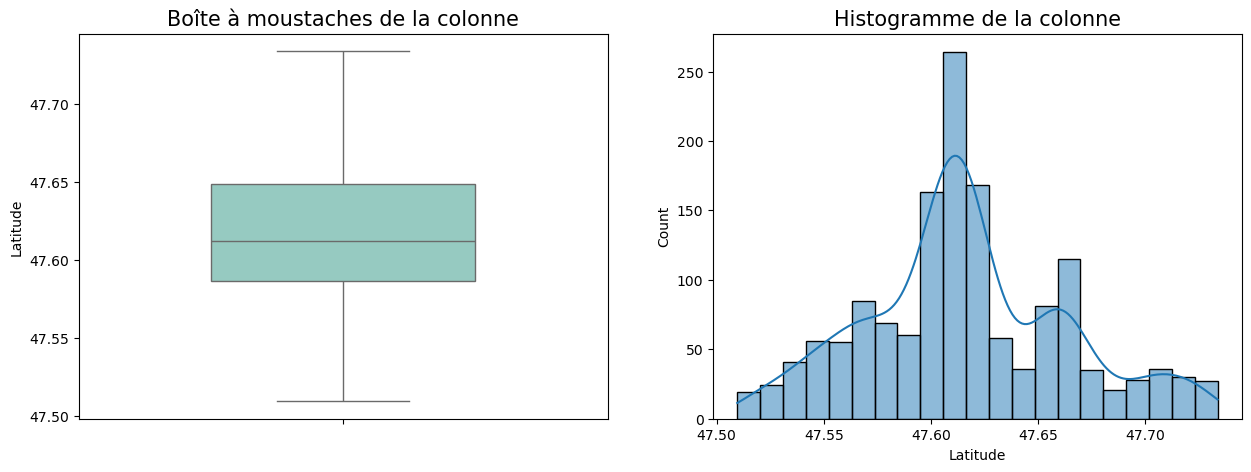

****************************************************************************************************
Analyse de la colonne Longitude
****************************************************************************************************
Moyenne : -122.33
Médiane : -122.33
Mode : 0   -122.3
Name: Longitude, dtype: float64
Variance : 0.0
Écart type : 0.02
Asymétrie : -0.16
Kurtosis : 0.89
Minimum : -122.41
25% : -122.34
50% : -122.33
75% : -122.32
Maximum : -122.26
la distribution de la colonne Longitude est étalée à gauche
la distribution de la colonne Longitude a le même aplatissement que la distribution normale


<Figure size 640x480 with 0 Axes>

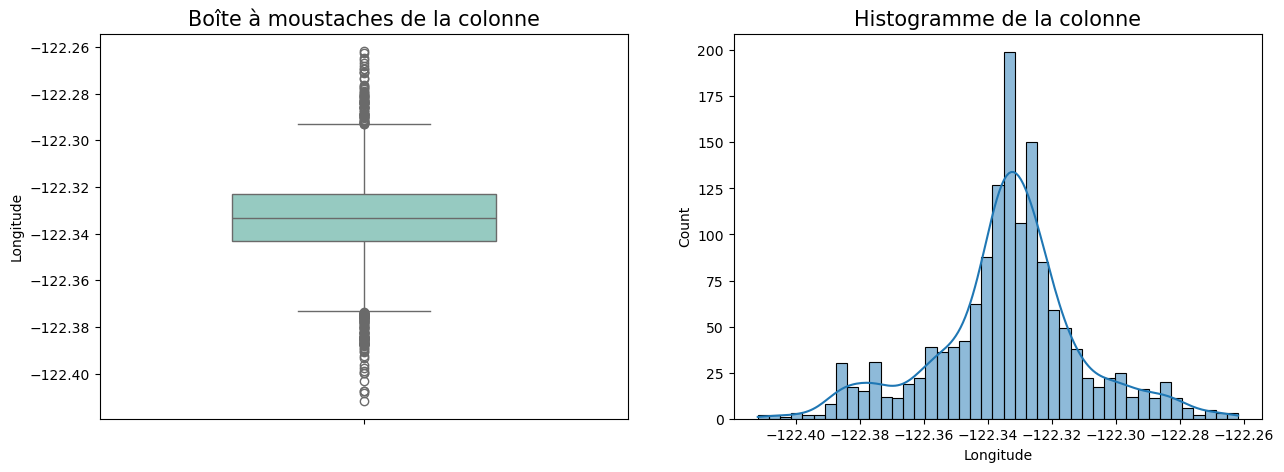

****************************************************************************************************
Analyse de la colonne NumberofBuildings
****************************************************************************************************
Moyenne : 1.14
Médiane : 1.0
Mode : 0    1.0
Name: NumberofBuildings, dtype: float64
Variance : 1.38
Écart type : 1.17
Asymétrie : 14.71
Kurtosis : 266.4
Minimum : 1.0
25% : 1.0
50% : 1.0
75% : 1.0
Maximum : 27.0
la distribution de la colonne NumberofBuildings est étalée à droite
la distribution de la colonne NumberofBuildings est moins aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

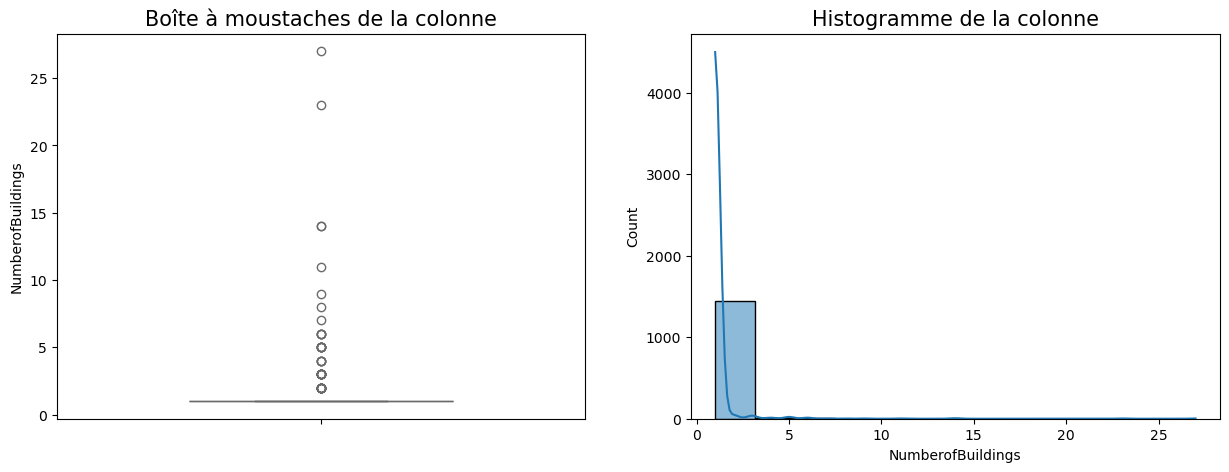

****************************************************************************************************
Analyse de la colonne NumberofFloors
****************************************************************************************************
Moyenne : 4.31
Médiane : 2.0
Mode : 0    1
Name: NumberofFloors, dtype: int64
Variance : 47.12
Écart type : 6.86
Asymétrie : 5.87
Kurtosis : 49.1
Minimum : 1
25% : 1.0
50% : 2.0
75% : 4.0
Maximum : 99
la distribution de la colonne NumberofFloors est étalée à droite
la distribution de la colonne NumberofFloors est moins aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

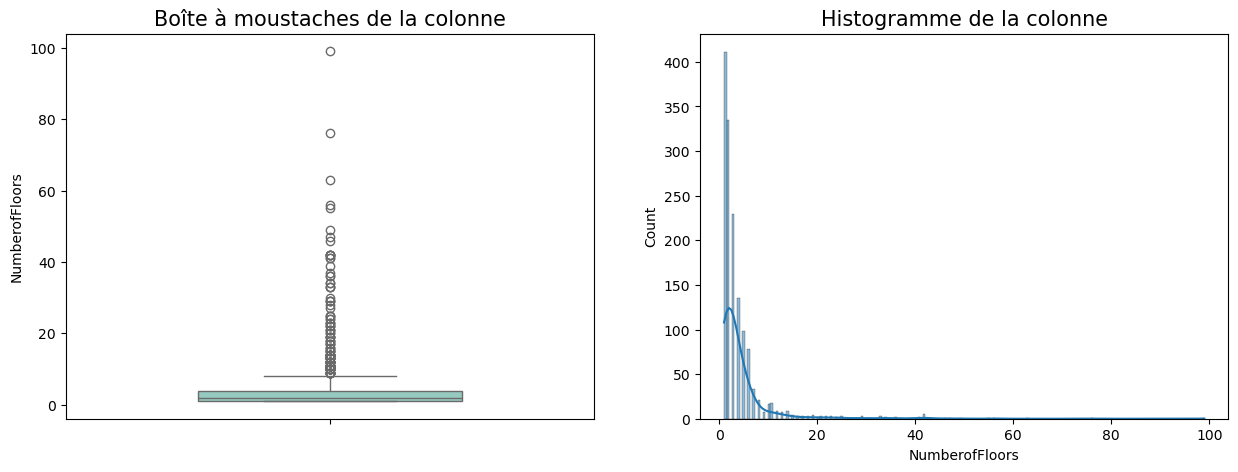

****************************************************************************************************
Analyse de la colonne PropertyGFATotal
****************************************************************************************************
Moyenne : 113262.94
Médiane : 47554.0
Mode : 0    25920
1    28800
2    36000
Name: PropertyGFATotal, dtype: int64
Variance : 38339774256.29
Écart type : 195805.45
Asymétrie : 5.0
Kurtosis : 33.01
Minimum : 11285
25% : 28800.0
50% : 47554.0
75% : 104049.5
Maximum : 2200000
la distribution de la colonne PropertyGFATotal est étalée à droite
la distribution de la colonne PropertyGFATotal est moins aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

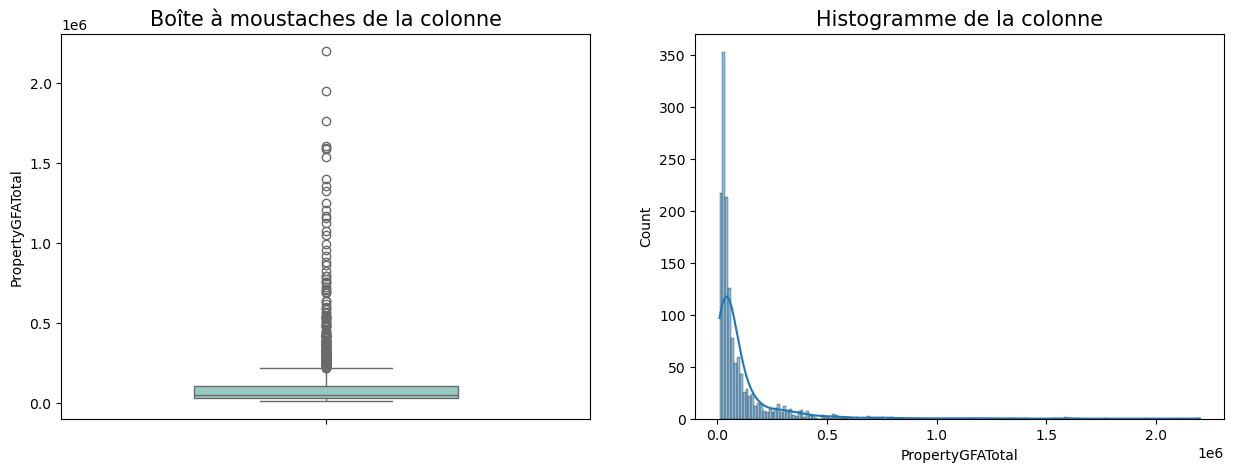

****************************************************************************************************
Analyse de la colonne PropertyGFAParking
****************************************************************************************************
Moyenne : 14039.5
Médiane : 0.0
Mode : 0    0
Name: PropertyGFAParking, dtype: int64
Variance : 1960981654.79
Écart type : 44282.97
Asymétrie : 5.02
Kurtosis : 32.59
Minimum : 0
25% : 0.0
50% : 0.0
75% : 0.0
Maximum : 512608
la distribution de la colonne PropertyGFAParking est étalée à droite
la distribution de la colonne PropertyGFAParking est moins aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

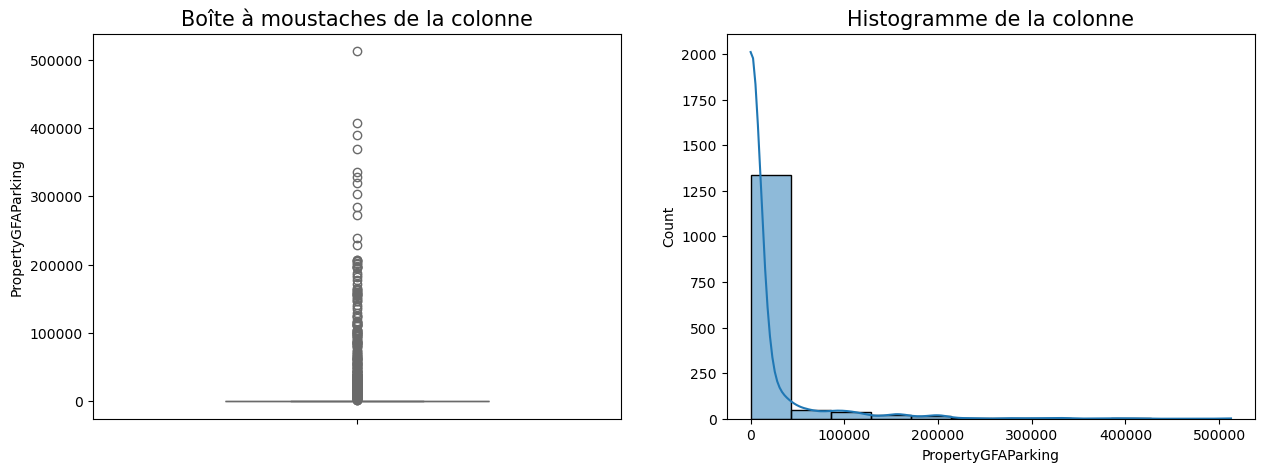

****************************************************************************************************
Analyse de la colonne PropertyGFABuilding(s)
****************************************************************************************************
Moyenne : 99223.44
Médiane : 45500.0
Mode : 0    25920
1    28800
2    36000
Name: PropertyGFABuilding(s), dtype: int64
Variance : 29646728464.72
Écart type : 172182.25
Asymétrie : 5.42
Kurtosis : 40.05
Minimum : 3636
25% : 27800.0
50% : 45500.0
75% : 93635.0
Maximum : 2200000
la distribution de la colonne PropertyGFABuilding(s) est étalée à droite
la distribution de la colonne PropertyGFABuilding(s) est moins aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

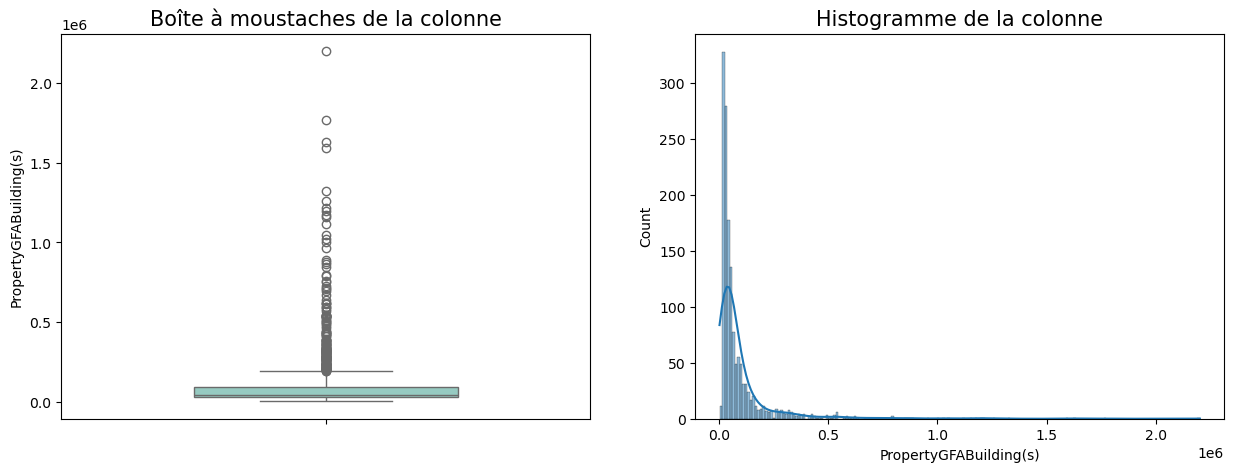

****************************************************************************************************
Analyse de la colonne LargestPropertyUseTypeGFA
****************************************************************************************************
Moyenne : 92498.85
Médiane : 41609.0
Mode : 0    24000.0
Name: LargestPropertyUseTypeGFA, dtype: float64
Variance : 26402489912.87
Écart type : 162488.43
Asymétrie : 5.24
Kurtosis : 35.89
Minimum : 5656.0
25% : 24757.0
50% : 41609.0
75% : 89103.0
Maximum : 1719643.0
la distribution de la colonne LargestPropertyUseTypeGFA est étalée à droite
la distribution de la colonne LargestPropertyUseTypeGFA est moins aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

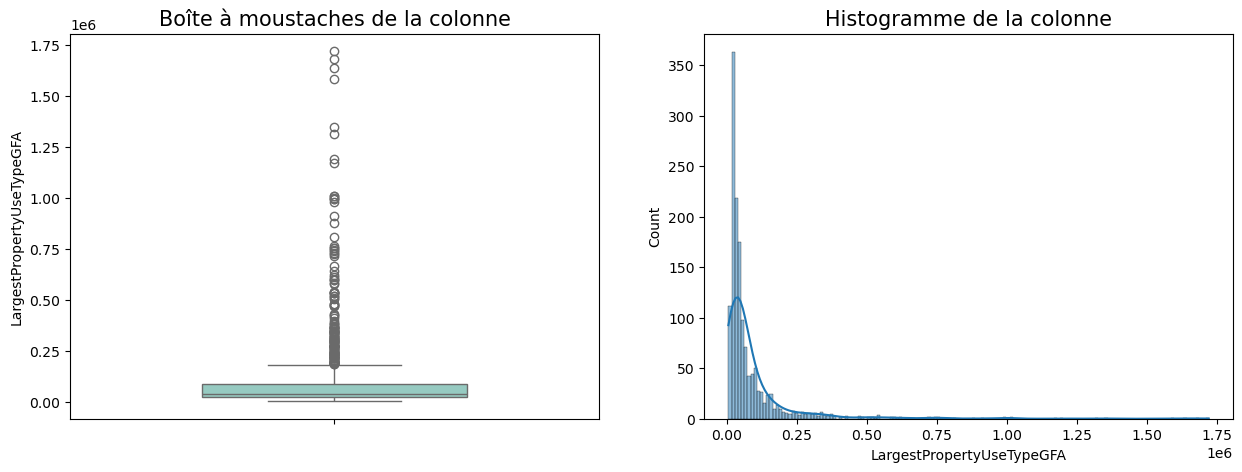

****************************************************************************************************
Analyse de la colonne SecondLargestPropertyUseTypeGFA
****************************************************************************************************
Moyenne : 19254.75
Médiane : 0.0
Mode : 0    0.0
Name: SecondLargestPropertyUseTypeGFA, dtype: float64
Variance : 2598422553.36
Écart type : 50974.72
Asymétrie : 5.12
Kurtosis : 34.55
Minimum : 0.0
25% : 0.0
50% : 0.0
75% : 13466.5
Maximum : 639931.0
la distribution de la colonne SecondLargestPropertyUseTypeGFA est étalée à droite
la distribution de la colonne SecondLargestPropertyUseTypeGFA est moins aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

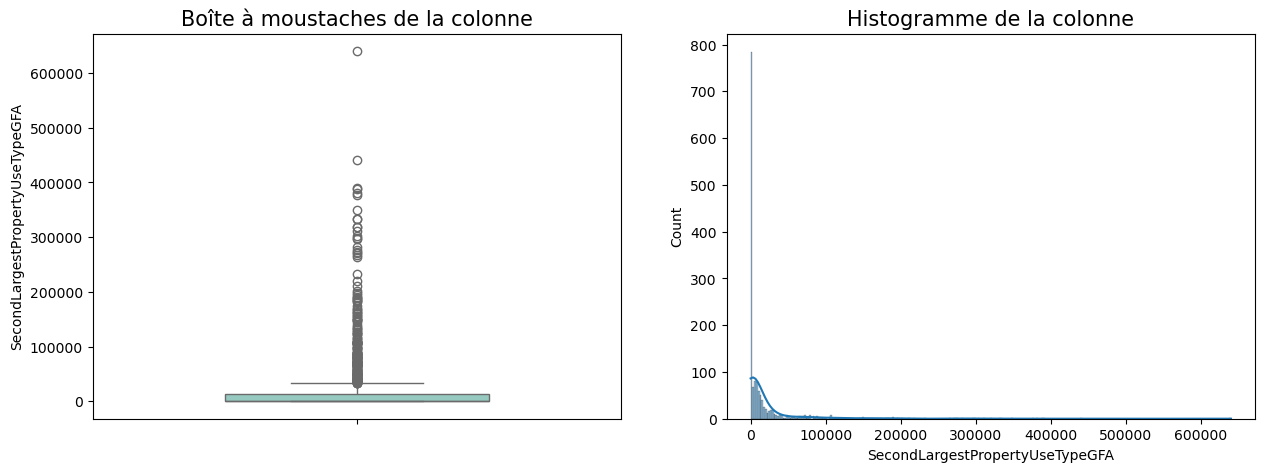

****************************************************************************************************
Analyse de la colonne ThirdLargestPropertyUseTypeGFA
****************************************************************************************************
Moyenne : 3118.99
Médiane : 0.0
Mode : 0    0.0
Name: ThirdLargestPropertyUseTypeGFA, dtype: float64
Variance : 318915844.6
Écart type : 17858.22
Asymétrie : 16.53
Kurtosis : 357.43
Minimum : 0.0
25% : 0.0
50% : 0.0
75% : 0.0
Maximum : 459748.0
la distribution de la colonne ThirdLargestPropertyUseTypeGFA est étalée à droite
la distribution de la colonne ThirdLargestPropertyUseTypeGFA est moins aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

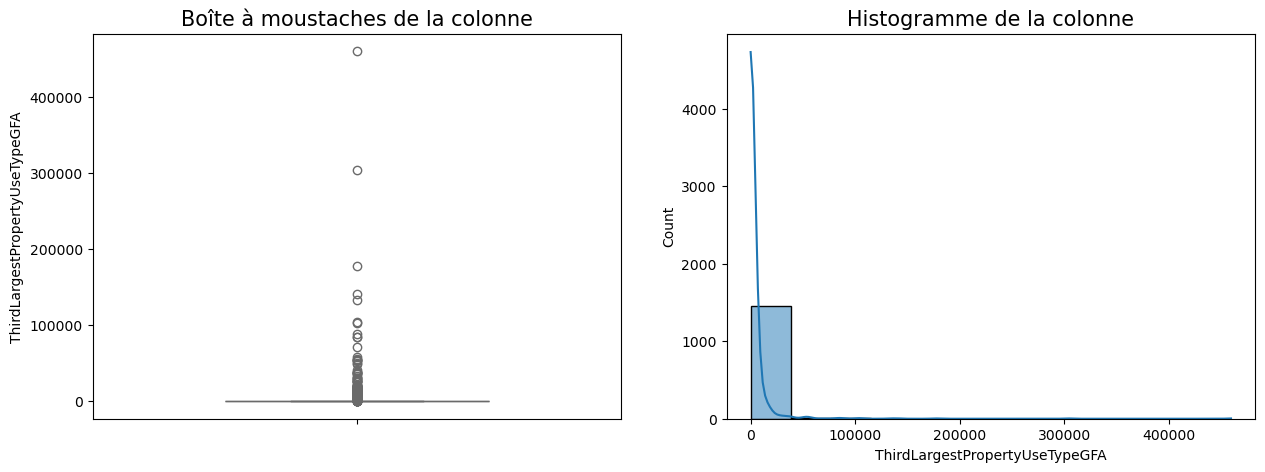

****************************************************************************************************
Analyse de la colonne ENERGYSTARScore
****************************************************************************************************
Moyenne : 63.89
Médiane : 71.0
Mode : 0     98.0
1    100.0
Name: ENERGYSTARScore, dtype: float64
Variance : 834.52
Écart type : 28.89
Asymétrie : -0.69
Kurtosis : -0.65
Minimum : 1.0
25% : 44.75
50% : 71.0
75% : 89.0
Maximum : 100.0
la distribution de la colonne ENERGYSTARScore est étalée à gauche
la distribution de la colonne ENERGYSTARScore est plus aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

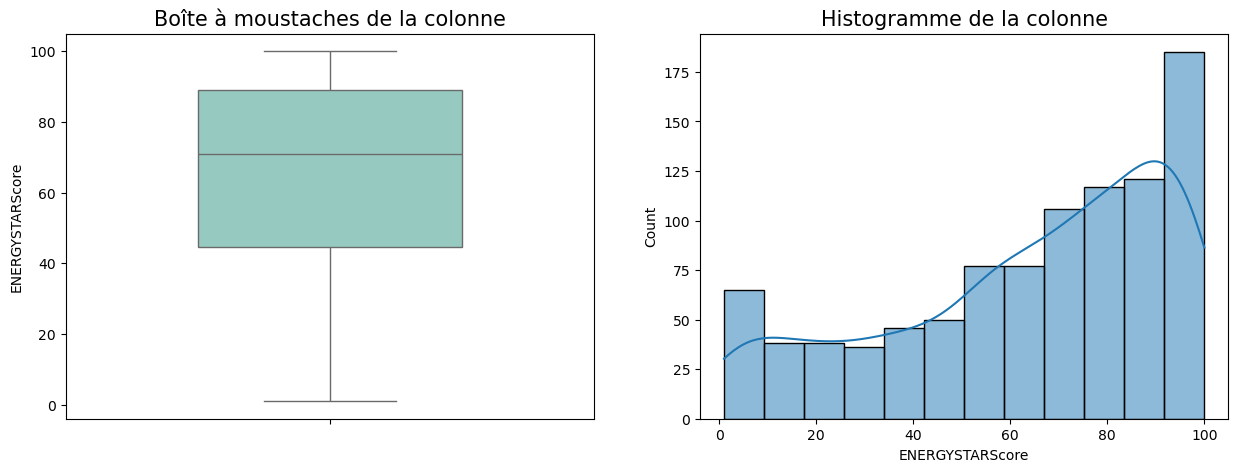

****************************************************************************************************
Analyse de la colonne SiteEUIWN(kBtu/sf)
****************************************************************************************************
Moyenne : 77.12
Médiane : 56.2
Mode : 0    52.3
Name: SiteEUIWN(kBtu/sf), dtype: float64
Variance : 5629.37
Écart type : 75.03
Asymétrie : 3.56
Kurtosis : 20.25
Minimum : 1.5
25% : 37.12
50% : 56.2
75% : 87.4
Maximum : 834.4
la distribution de la colonne SiteEUIWN(kBtu/sf) est étalée à droite
la distribution de la colonne SiteEUIWN(kBtu/sf) est moins aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

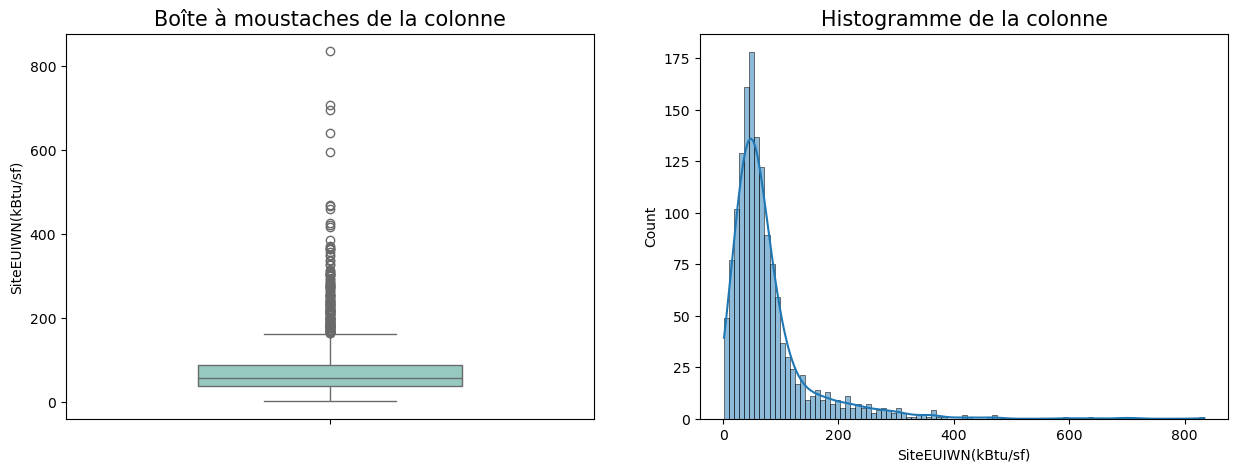

****************************************************************************************************
Analyse de la colonne SiteEnergyUseWN(kBtu)
****************************************************************************************************
Moyenne : 8363685.99
Médiane : 2796739.25
Mode : 0           58114.2
1           79967.9
2           90558.7
3           98862.9
4          109471.8
           ...     
1465    257764208.0
1466    274725984.0
1467    295929888.0
1468    296671744.0
1469    471613856.0
Name: SiteEnergyUseWN(kBtu), Length: 1470, dtype: float64
Variance : 533965043663954.3
Écart type : 23107683.65
Asymétrie : 11.03
Kurtosis : 166.43
Minimum : 58114.2
25% : 1311296.09
50% : 2796739.25
75% : 7426901.5
Maximum : 471613856.0
la distribution de la colonne SiteEnergyUseWN(kBtu) est étalée à droite
la distribution de la colonne SiteEnergyUseWN(kBtu) est moins aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

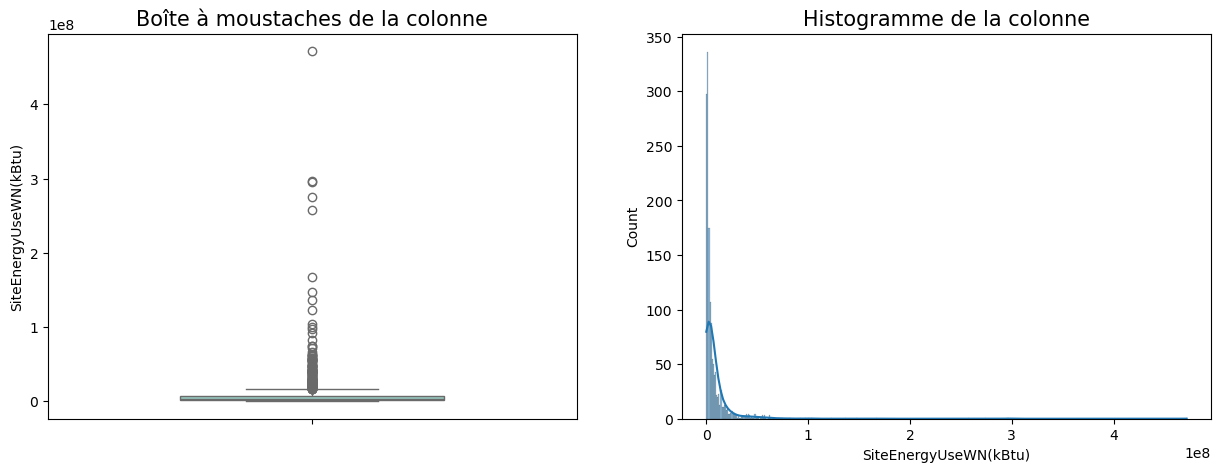

****************************************************************************************************
Analyse de la colonne SteamUse(kBtu)
****************************************************************************************************
Moyenne : 487728.63
Médiane : 0.0
Mode : 0    0.0
Name: SteamUse(kBtu), dtype: float64
Variance : 29169007197656.82
Écart type : 5400833.94
Asymétrie : 20.45
Kurtosis : 462.65
Minimum : 0.0
25% : 0.0
50% : 0.0
75% : 0.0
Maximum : 134943456.0
la distribution de la colonne SteamUse(kBtu) est étalée à droite
la distribution de la colonne SteamUse(kBtu) est moins aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

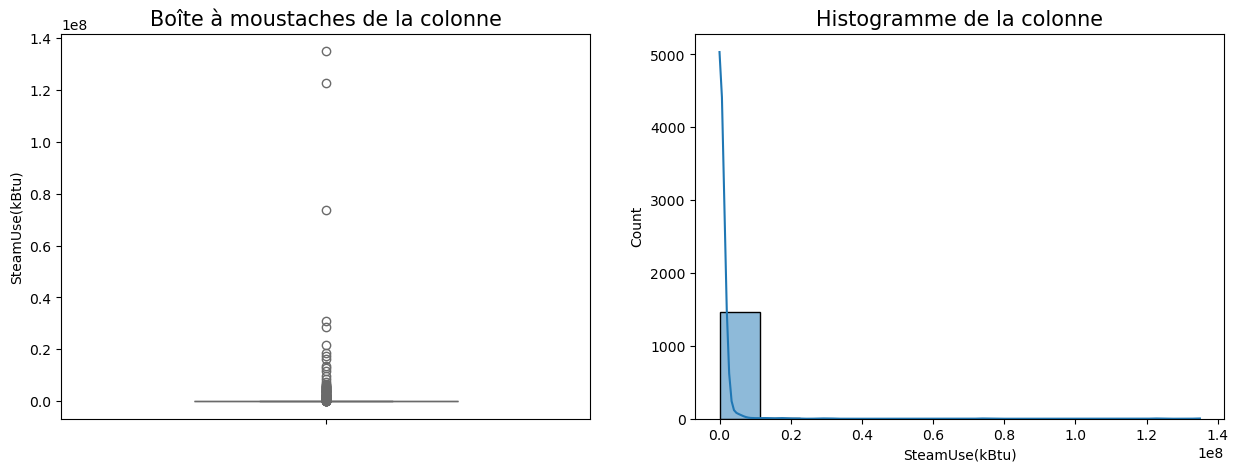

****************************************************************************************************
Analyse de la colonne Electricity(kBtu)
****************************************************************************************************
Moyenne : 5625062.11
Médiane : 1640689.0
Mode : 0    815508.0
Name: Electricity(kBtu), dtype: float64
Variance : 191399877177344.44
Écart type : 13834734.45
Asymétrie : 9.12
Kurtosis : 129.72
Minimum : 0.0
25% : 720558.0
50% : 1640689.0
75% : 5115903.5
Maximum : 274532495.0
la distribution de la colonne Electricity(kBtu) est étalée à droite
la distribution de la colonne Electricity(kBtu) est moins aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

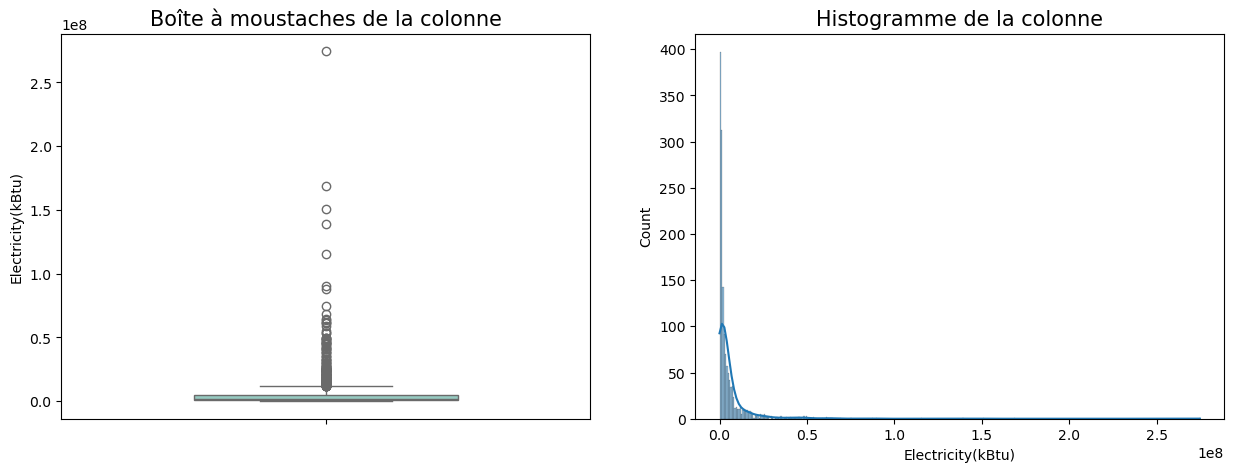

****************************************************************************************************
Analyse de la colonne NaturalGas(kBtu)
****************************************************************************************************
Moyenne : 2007516.79
Médiane : 476832.0
Mode : 0    0.0
Name: NaturalGas(kBtu), dtype: float64
Variance : 97961816367251.78
Écart type : 9897566.18
Asymétrie : 21.21
Kurtosis : 575.06
Minimum : 0.0
25% : 0.0
50% : 476832.0
75% : 1473313.5
Maximum : 297909000.0
la distribution de la colonne NaturalGas(kBtu) est étalée à droite
la distribution de la colonne NaturalGas(kBtu) est moins aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

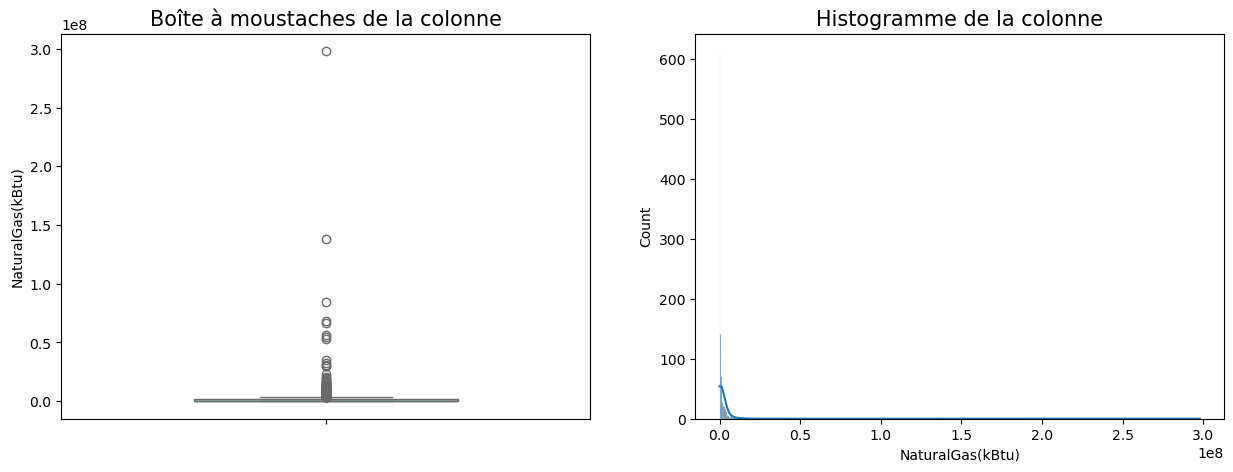

****************************************************************************************************
Analyse de la colonne TotalGHGEmissions
****************************************************************************************************
Moyenne : 183.48
Médiane : 49.25
Mode : 0    6.3
Name: TotalGHGEmissions, dtype: float64
Variance : 550106.57
Écart type : 741.69
Asymétrie : 14.58
Kurtosis : 264.04
Minimum : 0.4
25% : 20.11
50% : 49.25
75% : 142.16
Maximum : 16870.98
la distribution de la colonne TotalGHGEmissions est étalée à droite
la distribution de la colonne TotalGHGEmissions est moins aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

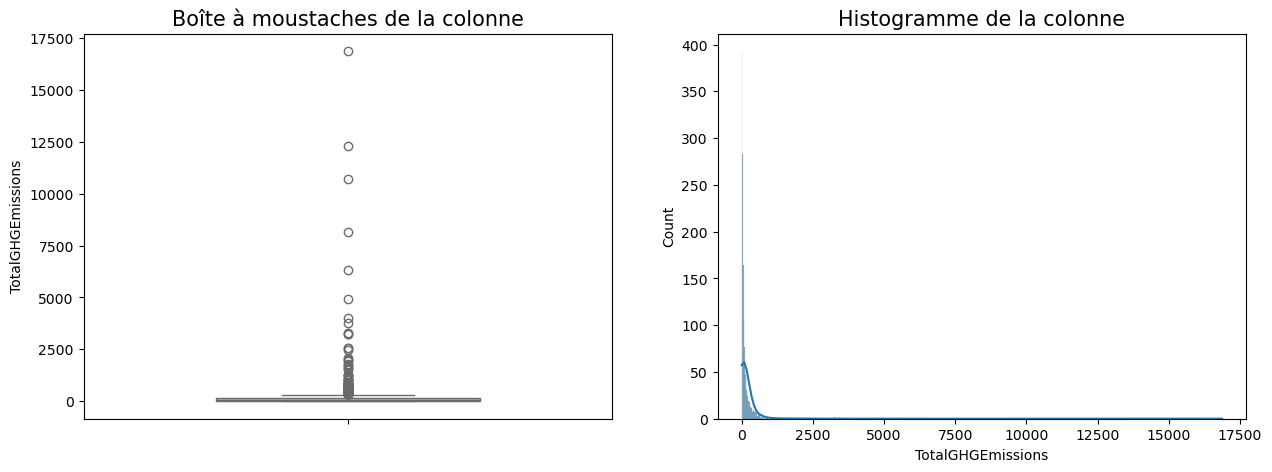

****************************************************************************************************
Analyse de la colonne GHGEmissionsIntensity
****************************************************************************************************
Moyenne : 1.64
Médiane : 0.88
Mode : 0    0.23
Name: GHGEmissionsIntensity, dtype: float64
Variance : 5.46
Écart type : 2.34
Asymétrie : 4.43
Kurtosis : 35.12
Minimum : 0.01
25% : 0.35
50% : 0.88
75% : 1.96
Maximum : 34.09
la distribution de la colonne GHGEmissionsIntensity est étalée à droite
la distribution de la colonne GHGEmissionsIntensity est moins aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

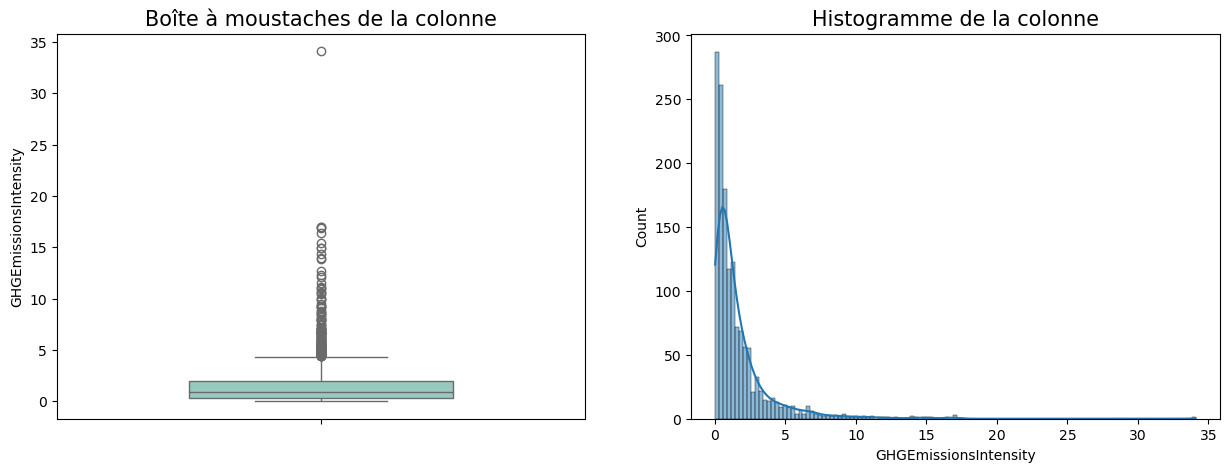

****************************************************************************************************
Analyse de la colonne BuildingAge
****************************************************************************************************
Moyenne : 54.54
Médiane : 51.0
Mode : 0    116
Name: BuildingAge, dtype: int64
Variance : 1078.2
Écart type : 32.84
Asymétrie : 0.28
Kurtosis : -1.06
Minimum : 1
25% : 28.0
50% : 51.0
75% : 86.0
Maximum : 116
la distribution de la colonne BuildingAge est symétrique
la distribution de la colonne BuildingAge est plus aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

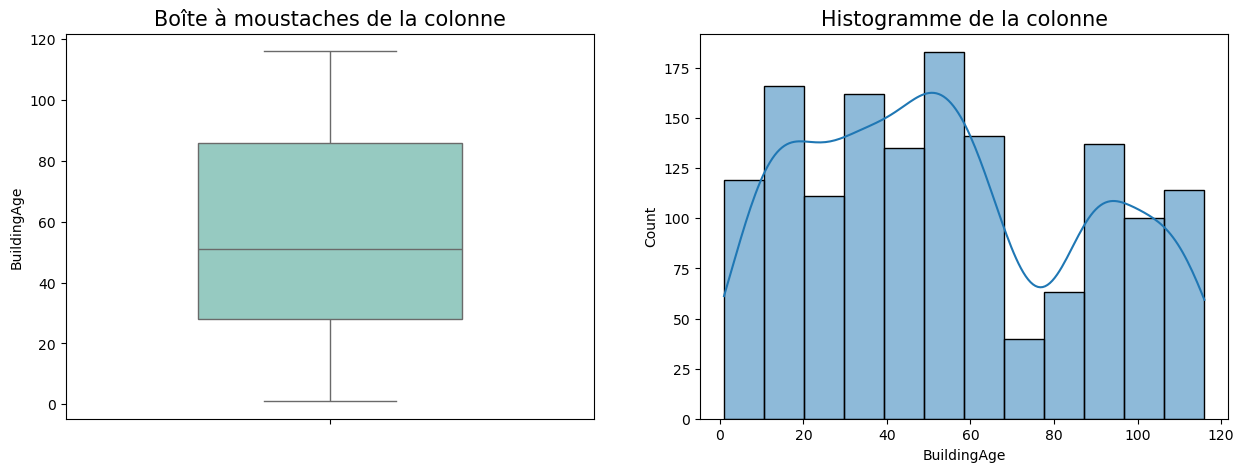

****************************************************************************************************
Analyse de la colonne ParkingRatioGFA
****************************************************************************************************
Moyenne : 0.07
Médiane : 0.0
Mode : 0    0.0
Name: ParkingRatioGFA, dtype: float64
Variance : 0.02
Écart type : 0.15
Asymétrie : 2.34
Kurtosis : 5.32
Minimum : 0.0
25% : 0.0
50% : 0.0
75% : 0.0
Maximum : 0.9
la distribution de la colonne ParkingRatioGFA est étalée à droite
la distribution de la colonne ParkingRatioGFA est moins aplatie que la distribution normale


<Figure size 640x480 with 0 Axes>

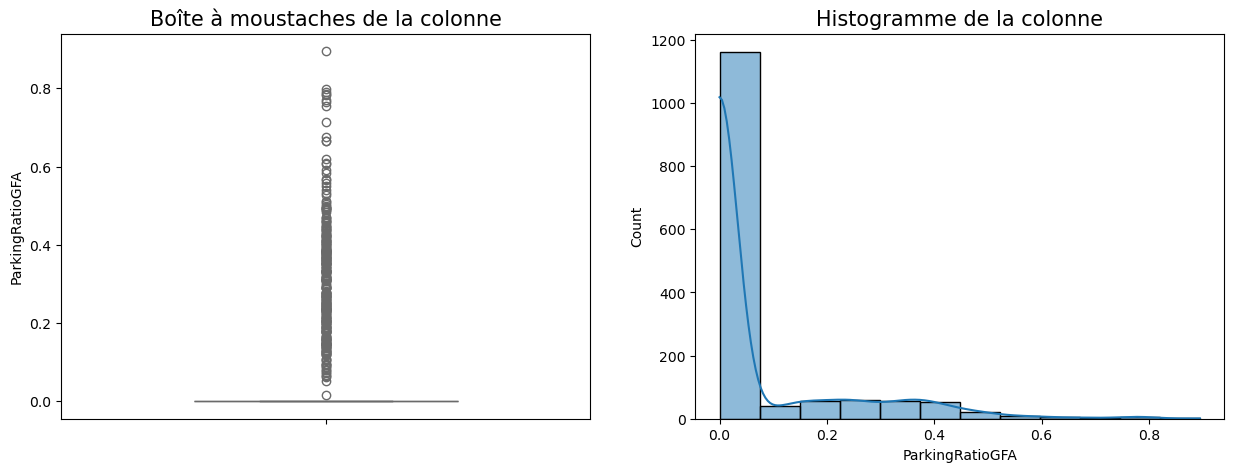

<Figure size 640x480 with 0 Axes>

In [43]:
colonnes_numeriques = data.select_dtypes(include=[np.number]).columns.tolist()

color_palette = 'Set3'

for colonne in colonnes_numeriques:
    print('**' * 50)
    print('Analyse de la colonne', colonne)
    print('**' * 50)

    print('Moyenne :', round(data[colonne].mean(), 2))
    print('Médiane :', round(data[colonne].median(), 2))
    print('Mode :', round(data[colonne].mode(), 2))
    print('Variance :', round(data[colonne].var(), 2))
    print('Écart type :', round(data[colonne].std(), 2))
    print('Asymétrie :', round(data[colonne].skew(), 2))
    print('Kurtosis :', round(data[colonne].kurtosis(), 2))
    print('Minimum :', round(data[colonne].min(), 2))
    print('25% :', round(data[colonne].quantile(0.25), 2))
    print('50% :', round(data[colonne].quantile(0.5), 2))
    print('75% :', round(data[colonne].quantile(0.75), 2))
    print('Maximum :', round(data[colonne].max(), 2))

    if np.floor(data[colonne].skew()) == 0:
        print('la distribution de la colonne ' + colonne + ' est symétrique')
    elif round(data[colonne].skew(), 2) > 0:
        print('la distribution de la colonne ' + colonne + ' est étalée à droite')
    else:
        print('la distribution de la colonne ' + colonne + ' est étalée à gauche')

    if np.floor(data[colonne].kurtosis()) == 0:
        print('la distribution de la colonne ' + colonne + ' a le même aplatissement que la distribution normale')
    elif round(data[colonne].kurtosis(), 2) > 0:
        print('la distribution de la colonne ' + colonne + ' est moins aplatie que la distribution normale')
    else:
        print('la distribution de la colonne ' + colonne + ' est plus aplatie que la distribution normale')

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(data[colonne], width=0.5, palette=color_palette)
    plt.title('Boîte à moustaches de la colonne', fontsize=15)
    plt.subplot(1, 2, 2)
    sns.histplot(data[colonne], kde=True, palette=color_palette)
    plt.title('Histogramme de la colonne', fontsize=15)
    plt.show()
    plt.tight_layout()

# Analyse bivarièe

In [44]:
sns.set(font_scale=3)
sns.pairplot(data[colonnes_numeriques],corner=True,height=5)
plt.show()

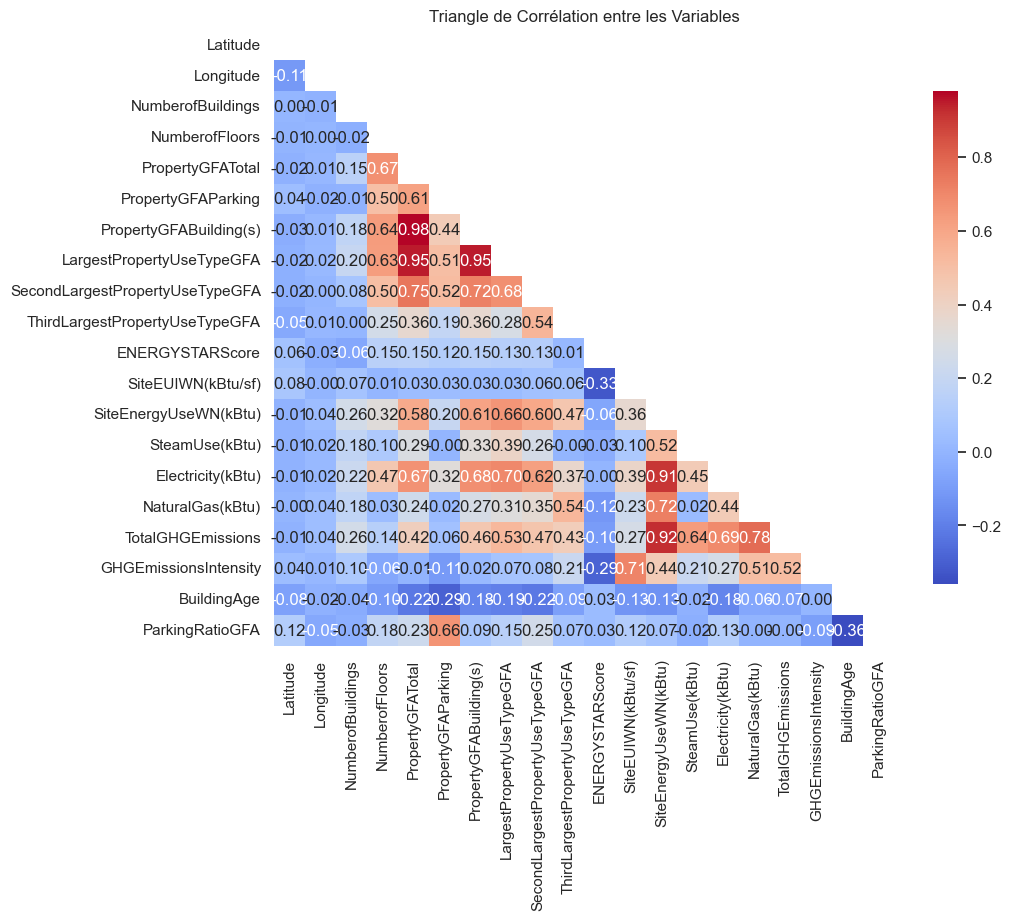

In [45]:
## Matrice de correlation des variables
data[colonnes_numeriques]

# Calcule de la matrice de corrélation
correlation_matrix = data[colonnes_numeriques].corr()

# masque pour la moitié supérieure du triangle de corrélation
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configuration du le style du tracé
sns.set(style="white")

# figure matplotlib
fig, ax = plt.subplots(figsize=(10, 8))

#le triangle de corrélation avec un dégradé de couleurs
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, cbar_kws={"shrink": 0.8})

#  détails au graphique
plt.title("Triangle de Corrélation entre les Variables")
plt.show()


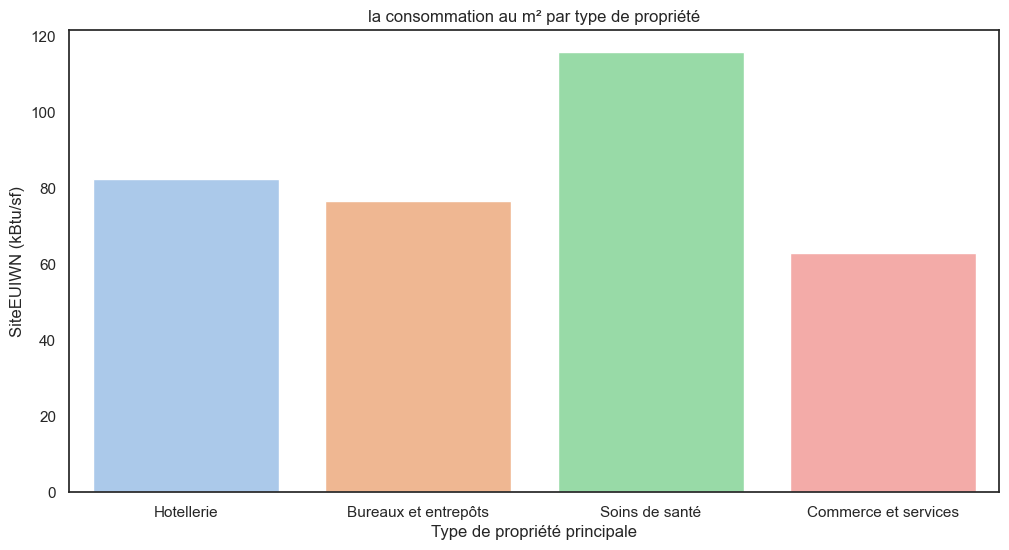

In [46]:
palette = sns.color_palette("pastel") 
plt.figure(figsize=(12, 6))
sns.barplot(x='PrimaryPropertyType', y='SiteEUIWN(kBtu/sf)', data= data,palette=palette ,ci=None)  # ci=None pour ne pas afficher l'intervalle de confiance
plt.title('la consommation au m² par type de propriété')
plt.xlabel('Type de propriété principale')
plt.ylabel('SiteEUIWN (kBtu/sf)')
plt.show()

Les Soins de santé consomment le plus d'électricité par mètre carré

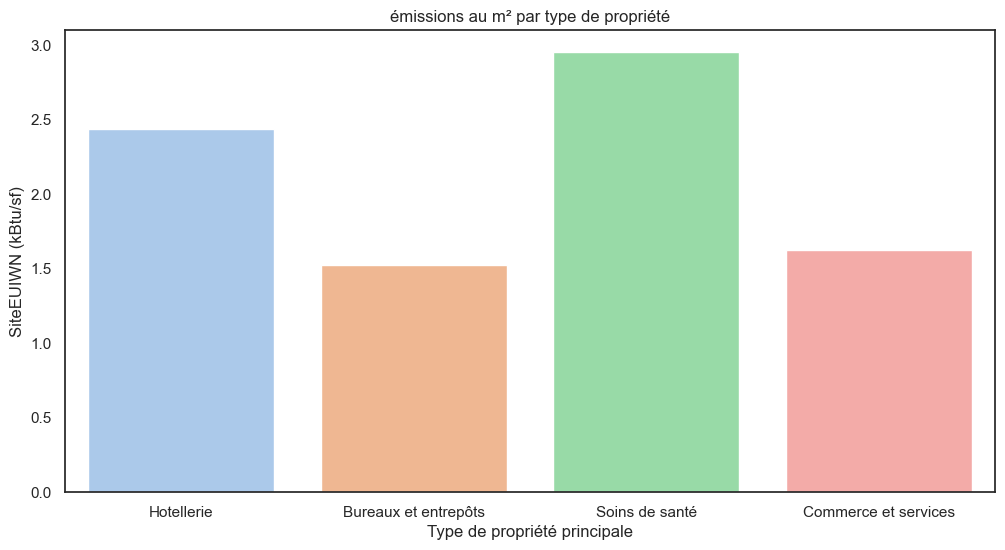

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(x='PrimaryPropertyType', y='GHGEmissionsIntensity', data= data,palette=palette ,ci=None)  # ci=None pour ne pas afficher l'intervalle de confiance
plt.title('émissions au m² par type de propriété')
plt.xlabel('Type de propriété principale')
plt.ylabel('SiteEUIWN (kBtu/sf)')
plt.show()

Les bâtiments hotellerie sont responsables de la majorité des émissions de gaz 

In [48]:
colonnes_a_supprimer = ['SiteEUIWN(kBtu/sf)', 'GHGEmissionsIntensity','PropertyGFABuilding(s)','PropertyGFAParking']
data = data.drop(colonnes_a_supprimer, axis=1)

In [49]:
data.head()

PrimaryPropertyType  Latitude  Longitude  NumberofBuildings  NumberofFloors  \
0          Hotellerie  47.61220 -122.33799                1.0              12   
1          Hotellerie  47.61317 -122.33393                1.0              11   
2          Hotellerie  47.61393 -122.33810                1.0              41   
3          Hotellerie  47.61412 -122.33664                1.0              10   
4          Hotellerie  47.61375 -122.34047                1.0              18   

   PropertyGFATotal LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0             88434             Hotellerie                    88434.0   
1            103566             Hotellerie                    83880.0   
2            956110             Hotellerie                   756493.0   
3             61320             Hotellerie                    61320.0   
4            175580             Hotellerie                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0         Bureaux et entrepôts                              0.0   
1         Bureaux et entrepôts                          15064.0   
2         Bureaux et entrepôts                              0.0   
3         Bureaux et entrepôts                              0.0   
4         Bureaux et entrepôts                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0        Bureaux et entrepôts                             0.0   
1        Commerce et services                          4622.0   
2        Bureaux et entrepôts                             0.0   
3        Bureaux et entrepôts                             0.0   
4        Bureaux et entrepôts                             0.0   

   ENERGYSTARScore  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
0             60.0              7456910.0      2003882.00          3946027.0   
1             61.0              8664479.0            0.00          3242851.0   
2             43.0             73937112.0     21566554.00         49526664.0   
3             56.0              6946800.5      2214446.25          2768924.0   
4             75.0             14656503.0            0.00          5368607.0   

   NaturalGas(kBtu)  TotalGHGEmissions  BuildingAge  ParkingRatioGFA  
0         1276453.0             249.98           89         0.000000  
1         5145082.0             295.86           20         0.145453  
2         1493800.0            2089.28           47         0.205748  
3         1811213.0             286.43           90         0.000000  
4         8803998.0             505.01           36         0.353115

Afin d'eviter le data leakage, j'attribue la valeur 0 en cas d'absence d'énergie et la valeur 1 dans le cas contraire pour les variables 'SteamUse(kBtu)_Usage', 'Electricity(kBtu)_Usage' et 'NaturalGas(kBtu)_Usage'.

In [50]:
def create_usage_column(value):
    if value == 0:
        return 0
    else:
        return 1

# Création des nouvelles colonnes
data['SteamUse(kBtu)_Usage'] = data['SteamUse(kBtu)'].apply(create_usage_column)
data['Electricity(kBtu)_Usage'] = data['Electricity(kBtu)'].apply(create_usage_column)
data['NaturalGas(kBtu)_Usage'] = data['NaturalGas(kBtu)'].apply(create_usage_column)

In [51]:
data = pd.get_dummies(data, columns=['PrimaryPropertyType'], prefix='PropertyType')
# Pour 'LargestPropertyUseType'
data = pd.get_dummies(data, columns=['LargestPropertyUseType'], prefix='LargestPropertyType')

# Pour 'SecondLargestPropertyUseType'
data = pd.get_dummies(data, columns=['SecondLargestPropertyUseType'], prefix='SecondLargestPropertyType')

# Pour 'ThirdLargestPropertyUseType'
data = pd.get_dummies(data, columns=['ThirdLargestPropertyUseType'], prefix='ThirdLargestPropertyType')


In [52]:
data.head()

Latitude  Longitude  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0  47.61220 -122.33799                1.0              12             88434   
1  47.61317 -122.33393                1.0              11            103566   
2  47.61393 -122.33810                1.0              41            956110   
3  47.61412 -122.33664                1.0              10             61320   
4  47.61375 -122.34047                1.0              18            175580   

   LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
0                    88434.0                              0.0   
1                    83880.0                          15064.0   
2                   756493.0                              0.0   
3                    61320.0                              0.0   
4                   123445.0                          68009.0   

   ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUseWN(kBtu)  \
0                             0.0             60.0              7456910.0   
1                          4622.0             61.0              8664479.0   
2                             0.0             43.0             73937112.0   
3                             0.0             56.0              6946800.5   
4                             0.0             75.0             14656503.0   

   SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
0      2003882.00          3946027.0         1276453.0             249.98   
1            0.00          3242851.0         5145082.0             295.86   
2     21566554.00         49526664.0         1493800.0            2089.28   
3      2214446.25          2768924.0         1811213.0             286.43   
4            0.00          5368607.0         8803998.0             505.01   

   BuildingAge  ParkingRatioGFA  SteamUse(kBtu)_Usage  \
0           89         0.000000                     1   
1           20         0.145453                     0   
2           47         0.205748                     1   
3           90         0.000000                     1   
4           36         0.353115                     0   

   Electricity(kBtu)_Usage  NaturalGas(kBtu)_Usage  \
0                        1                       1   
1                        1                       1   
2                        1                       1   
3                        1                       1   
4                        1                       1   

   PropertyType_Bureaux et entrepôts  PropertyType_Commerce et services  \
0                                  0                                  0   
1                                  0                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  0                                  0   

   PropertyType_Hotellerie  PropertyType_Soins de santé  \
0                        1                            0   
1                        1                            0   
2                        1                            0   
3                        1                            0   
4                        1                            0   

   LargestPropertyType_Bureaux et entrepôts  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   LargestPropertyType_Commerce et services  LargestPropertyType_Hotellerie  \
0                                         0                               1   
1                                         0                               1   
2                                         0                               1   
3                                         0                               1   
4                                         0                

In [53]:
colonnes_a_supprimer = ['SteamUse(kBtu)', 'Electricity(kBtu)','NaturalGas(kBtu)']
data = data.drop(colonnes_a_supprimer, axis=1)

In [54]:
data.shape

(1471, 32)

In [55]:
data.columns

Index(['Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions',
       'BuildingAge', 'ParkingRatioGFA', 'SteamUse(kBtu)_Usage',
       'Electricity(kBtu)_Usage', 'NaturalGas(kBtu)_Usage',
       'PropertyType_Bureaux et entrepôts',
       'PropertyType_Commerce et services', 'PropertyType_Hotellerie',
       'PropertyType_Soins de santé',
       'LargestPropertyType_Bureaux et entrepôts',
       'LargestPropertyType_Commerce et services',
       'LargestPropertyType_Hotellerie', 'LargestPropertyType_Soins de santé',
       'SecondLargestPropertyType_Bureaux et entrepôts',
       'SecondLargestPropertyType_Commerce et services',
       'SecondLargestPropertyType_Hotellerie',
       'SecondLargestPropertyType_Soins de santé',
       'ThirdLargestPropertyType_Bureaux et entrepôts'

In [56]:
data.shape

(1471, 32)

In [57]:
data.isna().sum()

Latitude                                            0
Longitude                                           0
NumberofBuildings                                   0
NumberofFloors                                      0
PropertyGFATotal                                    0
LargestPropertyUseTypeGFA                           4
SecondLargestPropertyUseTypeGFA                     0
ThirdLargestPropertyUseTypeGFA                      0
ENERGYSTARScore                                   515
SiteEnergyUseWN(kBtu)                               1
TotalGHGEmissions                                   0
BuildingAge                                         0
ParkingRatioGFA                                     0
SteamUse(kBtu)_Usage                                0
Electricity(kBtu)_Usage                             0
NaturalGas(kBtu)_Usage                              0
PropertyType_Bureaux et entrepôts                   0
PropertyType_Commerce et services                   0
PropertyType_Hotellerie     

In [58]:
data.dropna(subset=['SiteEnergyUseWN(kBtu)'], inplace=True)
data.dropna(subset=['LargestPropertyUseTypeGFA'], inplace=True)

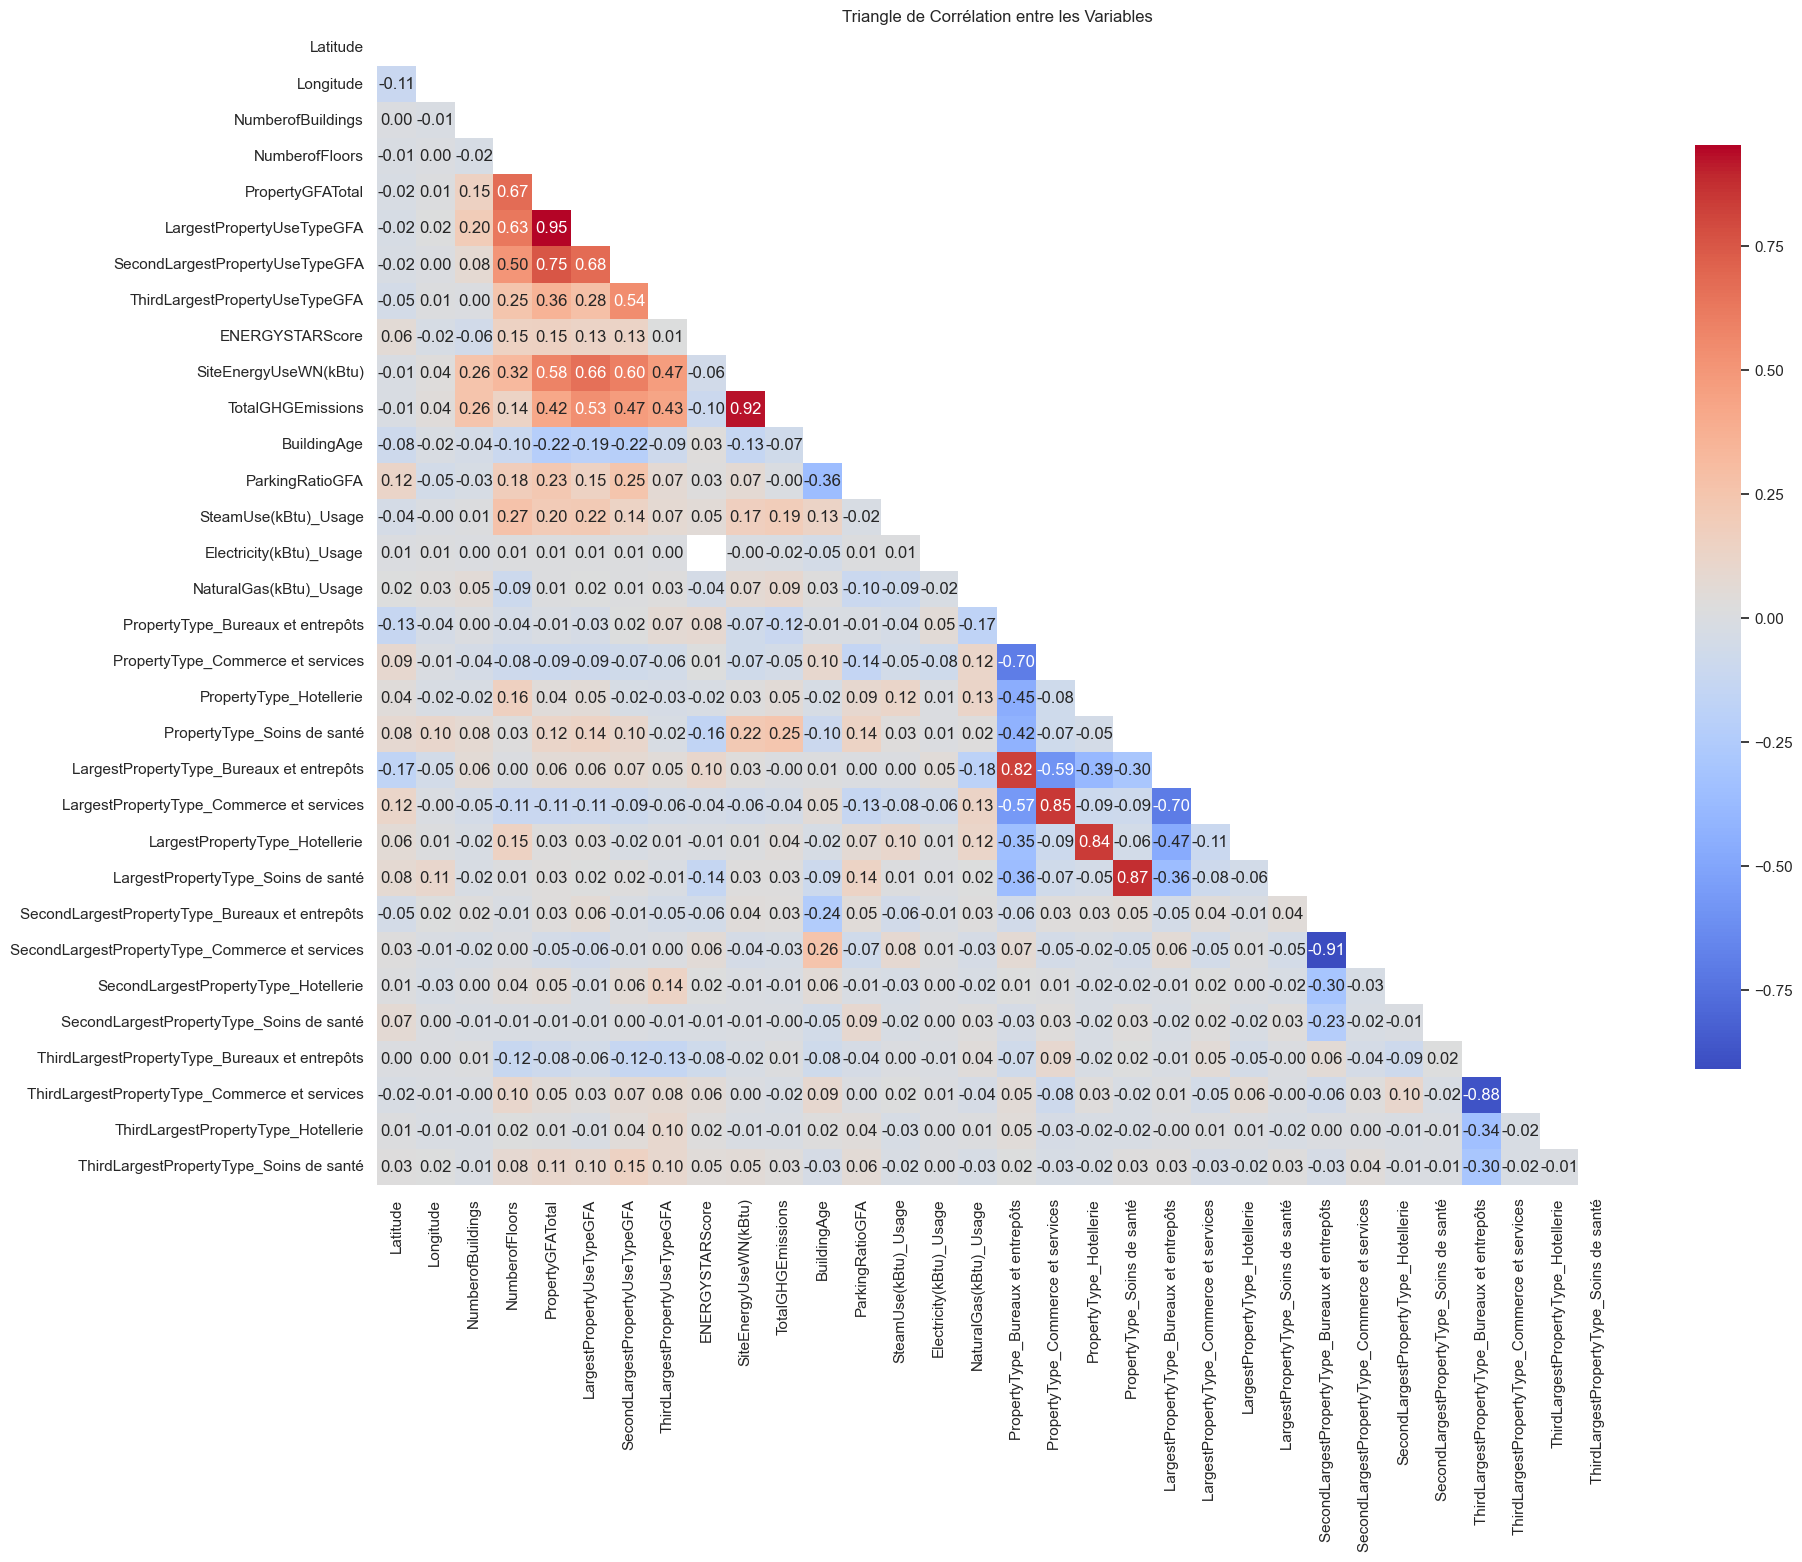

In [59]:
colonnes_numeriques2 = data.select_dtypes(include=[np.number]).columns.tolist()

## Matrice de correlation des variables
data[colonnes_numeriques2]

# Calcule de la matrice de corrélation
correlation_matrix = data[colonnes_numeriques2].corr()

# masque pour la moitié supérieure du triangle de corrélation
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configuration du le style du tracé
sns.set(style="white")

# figure matplotlib
fig, ax = plt.subplots(figsize=(20, 15))

#le triangle de corrélation avec un dégradé de couleurs
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, cbar_kws={"shrink": 0.8})

#  détails au graphique
plt.title("Triangle de Corrélation entre les Variables")
plt.show()

In [60]:
counts = data['Electricity(kBtu)_Usage'].value_counts()
counts

1    1465
0       1
Name: Electricity(kBtu)_Usage, dtype: int64

In [61]:
# Compter le nombre d'énergies utilisées par bâtiment
data['NombreEnergiesUtilisees'] = data[['SteamUse(kBtu)_Usage', 'Electricity(kBtu)_Usage', 'NaturalGas(kBtu)_Usage']].sum(axis=1)


j'ai noté qu'un seul bâtiment n'utilise pas l'électricité. J'ai ajouté une variable, 'NombreEnergiesUtilisees', pour compter le nombre d'énergies utilisées par chaque bâtiment, accentuant ainsi la diversité énergétique.

In [62]:
data.to_csv(r'C:\Users\imane\Downloads\data_science\projet4\projet4.csv' , index=False)